# Spike History Analysis (LMC minimal dataset)

This notebook uses the cache builder in `scripts/spikehistory_cache_builder.py` to generate per-recording firing-rate and spike-time caches from the minimal analog dataset (`/Volumes/MannySSD/lmc_project_v2_MINIMAL`).

**Important:** The builder writes to a fresh output base; if that path already exists, it aborts to avoid overwriting. Update `output_base` below if needed.

In [3]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd

# Ensure repo is on sys.path
repo_root = Path('/Users/ecrespo/Documents/github_project_folder/mua_analysis')
if not repo_root.exists():
    repo_root = Path.cwd().resolve().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from scripts.spikehistory_cache_builder import SpikeHistoryCacheBuilder

# Configure paths
DATA_ROOT = Path('/Volumes/MannySSD/lmc_project_v2_MINIMAL') 
OUTPUT_BASE = Path('/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run14_all')

# Initialize builder (does not run yet)
builder = SpikeHistoryCacheBuilder(data_root=DATA_ROOT, output_base=OUTPUT_BASE)

In [4]:
# Build caches into OUTPUT_BASE if they don't exist yet
if OUTPUT_BASE.exists():
    print(f"{OUTPUT_BASE} already exists. If you want a fresh run, change OUTPUT_BASE to a new folder.")
else:
    print(f"Building caches into {OUTPUT_BASE} ...")
    builder.run()
    print("Done.")


/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run14_all already exists. If you want a fresh run, change OUTPUT_BASE to a new folder.


In [5]:
builder.summarize_output(base=OUTPUT_BASE, max_records=10)

Found 4 recording caches under /Volumes/MannySSD/PSTH_regenerated_cache_lmc_run14_all

Lmc_noopsin:
  files_present: {'meta.parquet': False, 'trials.parquet': False, 'firing_tensor.npz': False, 'spikes_relative.npz': False, 'psth_mean_sem.npz': False}

Lmc_opsin:
  files_present: {'meta.parquet': False, 'trials.parquet': False, 'firing_tensor.npz': False, 'spikes_relative.npz': False, 'psth_mean_sem.npz': False}

Lmc_noopsin:
  files_present: {'meta.parquet': False, 'trials.parquet': False, 'firing_tensor.npz': False, 'spikes_relative.npz': False, 'psth_mean_sem.npz': False}

Lmc_opsin:
  files_present: {'meta.parquet': False, 'trials.parquet': False, 'firing_tensor.npz': False, 'spikes_relative.npz': False, 'psth_mean_sem.npz': False}


In [6]:
# Inspect inputs (paths and availability)
inputs_df = builder.summarize_inputs()

         recording_name   group_name  mua_exists  timestamp_exists
0    lmc_ch_1_3094_rec1    Lmc_opsin        True              True
1    lmc_ch_1_3094_rec2    Lmc_opsin        True              True
2    lmc_ch_2_3093_rec1    Lmc_opsin        True              True
3  lmc_noch_1_3096_rec1  Lmc_noopsin        True              True
4  lmc_noch_1_3096_rec2  Lmc_noopsin        True              True
5    lmc_ch_2_3093_rec1    Lmc_opsin        True              True
6    lmc_ch_1_3094_rec2    Lmc_opsin        True              True
7    lmc_ch_1_3094_rec1    Lmc_opsin        True              True
8  lmc_noch_1_3096_rec1  Lmc_noopsin        True              True
9  lmc_noch_1_3096_rec2  Lmc_noopsin        True              True


In [7]:
modality = "Whisker"   # or "LED"
rec_group = "Lmc_opsin"
rec_name = "lmc_ch_1_3094_rec1"

rec_dir = OUTPUT_BASE / modality / rec_group / rec_name
if not rec_dir.exists():
    raise FileNotFoundError(f"Cache not found at {rec_dir}")
summary = builder.inspect_recording_cache(rec_dir, verbose=True)
summary




lmc_ch_1_3094_rec1:
  meta: {'shape': (1, 12), 'dtypes': {'recording_name': dtype('O'), 'group_name': dtype('O'), 'modality': dtype('O'), 'sampling_rate': dtype('int64'), 'bin_size': dtype('float64'), 'good_channels': dtype('O'), 'noisy_channels': dtype('O'), 'n_trials': dtype('int64'), 'n_channels': dtype('int64'), 'n_timebins': dtype('int64'), 'window_ms_start': dtype('int64'), 'window_ms_end': dtype('int64')}, 'values': [{'recording_name': 'lmc_ch_1_3094_rec1', 'group_name': 'Lmc_opsin', 'modality': 'Whisker', 'sampling_rate': 10000, 'bin_size': 0.001, 'good_channels': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), 'noisy_channels': array([], dtype=object), 'n_trials': 1571, 'n_channels': 32, 'n_timebins': 1500, 'window_ms_start': -500, 'window_ms_end': 1000}]}
  trials: {'shape': (1571, 4), 'columns': ['trial_idx', 'onset_s', 'offset_s', 'stim_id'], 'dtypes': {'trial_idx': dtype('int64

{'rec_dir': '/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run14_all/Whisker/Lmc_opsin/lmc_ch_1_3094_rec1',
 'meta': {'shape': (1, 12),
  'dtypes': {'recording_name': dtype('O'),
   'group_name': dtype('O'),
   'modality': dtype('O'),
   'sampling_rate': dtype('int64'),
   'bin_size': dtype('float64'),
   'good_channels': dtype('O'),
   'noisy_channels': dtype('O'),
   'n_trials': dtype('int64'),
   'n_channels': dtype('int64'),
   'n_timebins': dtype('int64'),
   'window_ms_start': dtype('int64'),
   'window_ms_end': dtype('int64')},
  'values': [{'recording_name': 'lmc_ch_1_3094_rec1',
    'group_name': 'Lmc_opsin',
    'modality': 'Whisker',
    'sampling_rate': 10000,
    'bin_size': 0.001,
    'good_channels': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
    'noisy_channels': array([], dtype=object),
    'n_trials': 1571,
    'n_channels': 32,
    'n_timebins': 1500,
    'window_m

In [ ]:
from pathlib import Path
matches = list(OUTPUT_BASE.glob("*/Lmc_opsin/lmc_ch_1_3094_rec1"))
print(matches)  # pick the LED or Whisker one

In [8]:
from pathlib import Path
import numpy as np, pandas as pd

modality = "Whisker"   # or "LED"
rec_group = "Lmc_opsin"
rec_name = "lmc_ch_1_3094_rec1"

rec_dir = Path(OUTPUT_BASE) / modality / rec_group / rec_name
trials = pd.read_parquet(rec_dir / 'trials.parquet')
fhz = np.load(rec_dir / 'firing_tensor.npz', allow_pickle=True)['firing_hz']

print("[DEBUG] rec_dir:", rec_dir)
print("[DEBUG] fhz shape:", fhz.shape)
print("[DEBUG] overall min/max/mean:", fhz.min(), fhz.max(), fhz.mean())
print("[DEBUG] nonzero entries:", np.count_nonzero(fhz))

for stim_id in sorted(trials['stim_id'].unique()):
    idx = trials.index[trials['stim_id'] == stim_id].to_numpy()
    data = fhz[:, idx, :]
    print(f"[DEBUG] stim {stim_id}: trials {len(idx)}, min/max/mean:",
          data.min(), data.max(), data.mean())

print("[DEBUG] sample trace ch0 trial0 first 10 bins:", fhz[0, 0, :10])



[DEBUG] rec_dir: /Volumes/MannySSD/PSTH_regenerated_cache_lmc_run14_all/Whisker/Lmc_opsin/lmc_ch_1_3094_rec1
[DEBUG] fhz shape: (32, 1571, 1500)
[DEBUG] overall min/max/mean: 0.0 2379.56718737427 47.335466848324074
[DEBUG] nonzero entries: 47766637
[DEBUG] stim 1: trials 231, min/max/mean: 0.0 2379.56718737427 50.28077664733864
[DEBUG] stim 2: trials 248, min/max/mean: 0.0 2099.222328035486 53.52799961803345
[DEBUG] stim 3: trials 269, min/max/mean: 0.0 2259.1344982396986 52.30680840809291
[DEBUG] stim 4: trials 238, min/max/mean: 0.0 2219.9276213780954 52.93442546868013
[DEBUG] stim 8: trials 585, min/max/mean: 0.0 2176.1154515103094 38.98340236681455
[DEBUG] sample trace ch0 trial0 first 10 bins: [73.65405198 66.64494222 57.93832937 48.39416062 38.83722361 29.94550285
 22.18417414 15.79003679 10.79819681  7.09492087]


In [9]:
rec = load_cache("Lmc_opsin", "lmc_ch_1_3094_rec1")  # or any group/recording in run12
plot_pre_post_by_order(rec["fhz"], rec["tms"], rec["trials"],
                       stim_ids=[1,2,3,4], pre_trials=30, post_trials=30, channels=[0,1,2])


NameError: name 'load_cache' is not defined

In [10]:
from pathlib import Path
import pandas as pd

OUTPUT_BASE = Path('/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12')

for meta_path in sorted(OUTPUT_BASE.glob("*/*/meta.parquet")):
    meta = pd.read_parquet(meta_path)
    trials = pd.read_parquet(meta_path.parent / "trials.parquet")
    print(meta_path.parent)
    print(meta[["recording_name","group_name","modality"]])
    print({int(s): int((trials["stim_id"]==s).sum()) for s in trials["stim_id"].unique()})


/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Lmc_noopsin/lmc_noch_1_3096_rec1
         recording_name   group_name modality
0  lmc_noch_1_3096_rec1  Lmc_noopsin      LED
{8: 592, 2: 25, 1: 36, 4: 33, 3: 29}
/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Lmc_noopsin/lmc_noch_1_3096_rec2
         recording_name   group_name modality
0  lmc_noch_1_3096_rec2  Lmc_noopsin      LED
{8: 599, 3: 29, 2: 36, 4: 31, 1: 24}
/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Lmc_opsin/lmc_ch_1_3094_rec1
       recording_name group_name modality
0  lmc_ch_1_3094_rec1  Lmc_opsin      LED
{8: 585, 3: 29, 2: 30, 4: 21, 1: 30}
/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Lmc_opsin/lmc_ch_1_3094_rec2
       recording_name group_name modality
0  lmc_ch_1_3094_rec2  Lmc_opsin      LED
{8: 598, 2: 35, 4: 27, 1: 40, 3: 21}
/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Lmc_opsin/lmc_ch_2_3093_rec1
       recording_name group_name modality
0  lmc_ch_2_3093_rec1  Lmc_opsin      LED
{8: 594,

In [14]:
from pathlib import Path
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import ast

def report_bad_channels():
    for modality in ["LED", "Whisker"]:
        rr_path = DATA_ROOT / modality / "SpikeStuff" / "recording_results.csv"
        if not rr_path.exists():
            continue
        df = pd.read_csv(rr_path)
        print(f"\n[{modality}]")
        for _, row in df.iterrows():
            good = ast.literal_eval(row["good_channels"])
            bad = ast.literal_eval(row["noisy_channels"]) if "noisy_channels" in row else []
            all_ch = set(good) | set(bad)
            # assume 0..31; mark anything not in good as bad
            full = set(range(32))
            inferred_bad = sorted(full - set(good))
            print(f"{row['group_name']} {row['recording_name']}: "
                  f"good={len(good)} -> {good} | bad (from CSV)={bad} | inferred bad={inferred_bad}")

def get_good_channels(modality, group, rec):
    rr = pd.read_csv(DATA_ROOT / modality / 'SpikeStuff' / 'recording_results.csv')
    row = rr.query("group_name == @group and recording_name == @rec").iloc[0]
    return ast.literal_eval(row['good_channels'])

def load_cache(modality, rec_group, rec_name):
    rec_dir = OUTPUT_BASE / modality / rec_group / rec_name
    return {
        "rec_dir": rec_dir,
        "meta": pd.read_parquet(rec_dir / "meta.parquet"),
        "trials": pd.read_parquet(rec_dir / "trials.parquet"),
        "fhz": np.load(rec_dir / "firing_tensor.npz")["firing_hz"],
        "tms": np.load(rec_dir / "firing_tensor.npz")["time_ms"],
        "spikes_rel": np.load(rec_dir / "spikes_relative.npz", allow_pickle=True)["spikes_rel"],
    }

def _split_indices(idx_list, pre_trials=None, post_trials=None):
    if pre_trials is not None and post_trials is not None and len(idx_list) >= pre_trials + post_trials:
        return idx_list[:pre_trials], idx_list[pre_trials:pre_trials+post_trials]
    # fallback: half-split whatever exists
    half = len(idx_list)//2
    return idx_list[:half], idx_list[half:]

def plot_pre_post_by_order(fhz, tms, trials_df, stim_ids=(1,2,3,4),
                           pre_trials=30, post_trials=30, channels=(0,)):
    fig, axs = plt.subplots(len(channels), len(stim_ids),
                            figsize=(4*len(stim_ids), 3*len(channels)), squeeze=False)
    for ci, ch in enumerate(channels):
        for si, stim in enumerate(stim_ids):
            ax = axs[ci, si]
            idx_all = trials_df.index[trials_df["stim_id"] == stim].to_list()
            pre_idx, post_idx = _split_indices(idx_all, pre_trials, post_trials)
            print(f"[DEBUG] stim {stim} ch {ch}: total {len(idx_all)}, pre {len(pre_idx)}, post {len(post_idx)}")
            if pre_idx:
                data = fhz[ch, pre_idx, :]
                m = data.mean(axis=0); s = data.std(axis=0)/np.sqrt(data.shape[0])
                ax.plot(tms, m, color="grey", lw=2, label=f"Pre n={len(pre_idx)}")
                ax.fill_between(tms, m-s, m+s, color="grey", alpha=0.25)
            if post_idx:
                data = fhz[ch, post_idx, :]
                m = data.mean(axis=0); s = data.std(axis=0)/np.sqrt(data.shape[0])
                ax.plot(tms, m, color="blue", lw=2, label=f"Post n={len(post_idx)}")
                ax.fill_between(tms, m-s, m+s, color="blue", alpha=0.25)
            ax.axvline(0, color="red", ls="--")
            ax.set_title(f"Ch {ch} Stim {stim}")
            ax.legend()
    plt.tight_layout(); plt.show()

def debug_pool(modality_filter=None, stim_ids=(1,2,3,4)):
    rec_dirs = sorted(OUTPUT_BASE.glob("*/*/*/meta.parquet"))
    print(f"[DEBUG] scanning {len(rec_dirs)} meta files under {OUTPUT_BASE}")
    for meta_path in rec_dirs:
        meta = pd.read_parquet(meta_path)
        modality = meta.iloc[0].get("modality","")
        if modality_filter and modality != modality_filter:
            continue
        rec_dir = meta_path.parent
        rec_group = meta.iloc[0].get("group_name")
        trials = pd.read_parquet(rec_dir/"trials.parquet")
        counts = {s: int((trials["stim_id"] == s).sum()) for s in stim_ids}
        print(f"[DEBUG] {modality} {rec_group} {rec_dir.name} counts={counts}")

def debug_chemicalstim(pre_trials=30, post_trials=30, stim_ids=(1,2,3,4)):
    rec_dirs = sorted(OUTPUT_BASE.glob("*/*/*/meta.parquet"))
    print(f"[DEBUG] scanning {len(rec_dirs)} caches under {OUTPUT_BASE}")
    for meta_path in rec_dirs:
        meta = pd.read_parquet(meta_path)
        rec_dir = meta_path.parent
        rec_name = meta.iloc[0]["recording_name"]
        group = meta.iloc[0]["group_name"]
        modality = meta.iloc[0].get("modality","")
        trials = pd.read_parquet(rec_dir / "trials.parquet")
        print(f"{modality} {group} {rec_name}")
        for stim in stim_ids:
            idx_all = trials.index[trials["stim_id"] == stim].to_list()
            total = len(idx_all)
            if total >= pre_trials + post_trials:
                pre = pre_trials
                post = post_trials
            else:
                half = total // 2
                pre = half
                post = total - half
            print(f"  stim {stim}: total {total}, pre {pre}, post {post}")

def plot_whisker_groups_prepost(stim_ids=(1,2,3,4), pre_trials=30, post_trials=30, channels="all"):
    def split(idx_list):
        if len(idx_list) >= pre_trials + post_trials:
            return idx_list[:pre_trials], idx_list[pre_trials:pre_trials+post_trials]
        half = len(idx_list)//2
        return idx_list[:half], idx_list[half:]

    pools = {g:{s:{"pre":[], "post":[]} for s in stim_ids} for g in ["Lmc_noopsin","Lmc_opsin"]}
    tms_ref = None
    rec_dirs = sorted(OUTPUT_BASE.glob("Whisker/*/*/meta.parquet"))
    print(f"[DEBUG] found {len(rec_dirs)} Whisker meta files under {OUTPUT_BASE}")

    # per-recording channel counts
    rec_chan_counts = []

    for meta_path in rec_dirs:
        meta = pd.read_parquet(meta_path)
        rec_group = meta.iloc[0]["group_name"]
        rec_name  = meta.iloc[0]["recording_name"]
        chans = get_good_channels('Whisker', rec_group, rec_name)
        ch_list = chans # use only good channels that are not noisy
        rec_dir = meta_path.parent
        trials = pd.read_parquet(rec_dir/"trials.parquet")
        firing = np.load(rec_dir/"firing_tensor.npz")
        fhz = firing["firing_hz"]; tms = firing["time_ms"]
        if tms_ref is None: tms_ref = tms
        ch_list = range(fhz.shape[0]) if channels=="all" else channels
        rec_chan_counts.append((rec_group, rec_name, len(ch_list)))

        for stim in stim_ids:
            idx_all = trials.index[trials["stim_id"] == stim].to_list()
            pre_idx, post_idx = split(idx_all)
            for ch in ch_list:
                if pre_idx:  pools[rec_group][stim]["pre"].append(fhz[ch, pre_idx, :])
                if post_idx: pools[rec_group][stim]["post"].append(fhz[ch, post_idx, :])

    # print per-recording channel usage
    print("[DEBUG] channels used per recording (Whisker):")
    for grp, rec, nchan in rec_chan_counts:
        print(f"  {grp} {rec}: channels {nchan}")

    fig, axs = plt.subplots(2, len(stim_ids), figsize=(4*len(stim_ids), 6), squeeze=False)
    for gi, group in enumerate(["Lmc_noopsin", "Lmc_opsin"]):
        for si, stim in enumerate(stim_ids):
            ax = axs[gi, si]
            for label, color in [("pre","grey"), ("post","blue")]:
                arrs = pools[group][stim][label]
                if not arrs: continue
                data = np.concatenate(arrs, axis=0)
                m = data.mean(axis=0); s = data.std(axis=0)/np.sqrt(data.shape[0])
                ax.plot(tms_ref, m, color=color, lw=2, label=f"{label} n={data.shape[0]}")
                ax.fill_between(tms_ref, m-s, m+s, color=color, alpha=0.25)
            ax.axvline(0, color="red", ls="--")
            ax.set_title(f"{group} Stim {stim}")
            if si == len(stim_ids)-1: ax.legend()
    plt.tight_layout(); plt.show()


Single recording (specify modality):

In [15]:
chans = get_good_channels('Whisker', 'Lmc_opsin', 'lmc_ch_1_3094_rec1')
rec = load_cache('Whisker', 'Lmc_opsin', 'lmc_ch_1_3094_rec1')
plot_pre_post_by_order(rec["fhz"], rec["tms"], rec["trials"],
                       stim_ids=[1,2,3,4], pre_trials=30, post_trials=30,
                       channels=chans)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12/Whisker/Lmc_opsin/lmc_ch_1_3094_rec1/meta.parquet'

### Group Whisker plot:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[DEBUG] found 0 Whisker meta files under /Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12
[DEBUG] channels used per recording (Whisker):


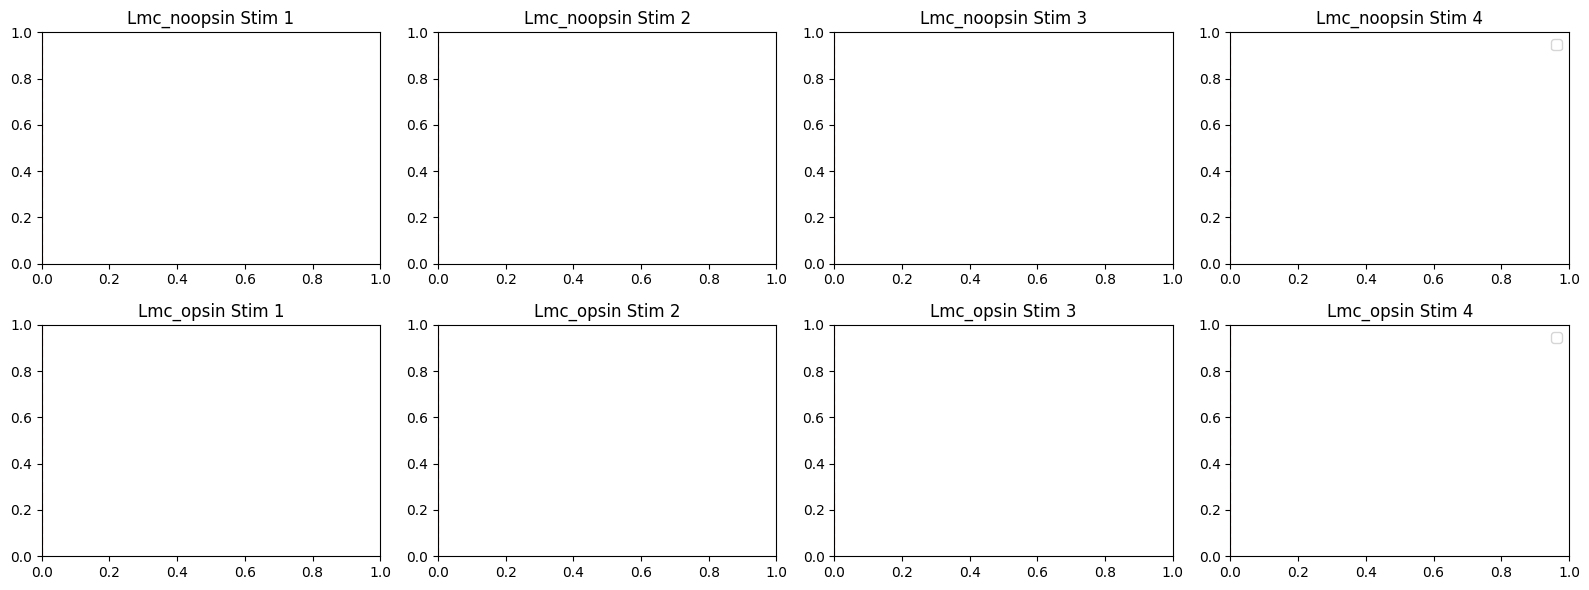

In [18]:
plot_whisker_groups_prepost(stim_ids=[1,2,3,4], pre_trials=30, post_trials=30, channels="all")

In [17]:
debug_pool(modality_filter="Whisker", stim_ids=[1,2,3,4])

[DEBUG] scanning 0 meta files under /Volumes/MannySSD/PSTH_regenerated_cache_lmc_run12


In [ ]:
debug_chemicalstim(pre_trials=30, post_trials=30, stim_ids=[1,2,3,4])

In [ ]:
spikes_rel = rec["spikes_rel"]  # object array [ch, trial] -> spike times (s) relative to onset
print("Example spike times ch0 trial0:", spikes_rel[0,0])

### rebuild cache with different binning parameters

In [19]:
from pathlib import Path
import numpy as np, pandas as pd
from scipy.io import loadmat
from scipy.signal import convolve

def rebuild_cache(data_root, output_base, bin_ms=1, smooth=True, gauss_ms=10, gauss_sigma_ms=2,
                  pre_ms=500, post_ms=1000, thresh_sigma=3, sampling_rate=10000):
    data_root = Path(data_root)
    output_base = Path(output_base)
    output_base.mkdir(parents=True, exist_ok=False)  # must be NEW

    old_roots = [
        '/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/Whisker/',
        '/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/LED/',
        '/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/'
    ]
    def normalize(path_str):
        p = str(path_str)
        for old in old_roots:
            if p.startswith(old):
                p = p.replace(old, str(data_root) + '/')
        return Path(p)

    def detect_spikes(mua_path):
        sig = np.load(mua_path)
        if sig.ndim == 1: sig = sig[:, None]
        if sig.shape[0] < sig.shape[1]: sig = sig.T
        sig = sig.astype(np.float32)
        sig = sig - np.median(sig, axis=0, keepdims=True)
        noise = np.median(np.abs(sig), axis=0) / 0.6745
        spikes = sig < (-thresh_sigma * noise)
        return spikes, sig.shape[0], sig.shape[1]

    def compute_firing(spikes):
        spb = int(sampling_rate * (bin_ms/1000))
        n_full = spikes.shape[0] // spb
        spikes = spikes[:n_full*spb, :]
        binned = spikes.reshape(n_full, spb, spikes.shape[1]).sum(axis=1)
        fr_hz = binned / (bin_ms/1000)
        if not smooth:
            return fr_hz.T  # (ch, time)
        w = int(gauss_ms / bin_ms)
        x = np.arange(-w//2, w//2+1)
        k = np.exp(-0.5*(x/(gauss_sigma_ms/bin_ms))**2); k /= k.sum()
        return np.vstack([convolve(fr_hz[:, ch], k, mode='same') for ch in range(fr_hz.shape[1])])

    for modality in ["LED", "Whisker"]:
        rr_path = data_root / modality / "SpikeStuff" / "recording_results.csv"
        if not rr_path.exists():
            continue
        df = pd.read_csv(rr_path)
        for _, row in df.iterrows():
            rec = row["recording_name"]
            group = row["group_name"]
            rec_dir = data_root / modality / "SpikeStuff" / group / rec
            mua_path = normalize(row.get("mua_data_path", rec_dir / "temp_wh_MUA.npy"))
            if not mua_path.exists():
                mua_path = rec_dir / "temp_wh_MUA.npy"
            ts_path = rec_dir / "MUA" / "allData" / "timestamp_s.mat"
            if not (mua_path.exists() and ts_path.exists()):
                print(f"Skip {rec}: missing {mua_path if not mua_path.exists() else ts_path}")
                continue

            print(f"[LOAD] {modality}/{group}/{rec}")
            print(f"       MUA: {mua_path}")
            spikes_mask, n_samples, n_ch = detect_spikes(mua_path)
            fhz = compute_firing(spikes_mask)
            ts = loadmat(ts_path)["timestamp_s"]
            ts = ts[np.isfinite(ts).all(axis=1)]
            time_ms = np.arange(-pre_ms, post_ms, bin_ms)
            pre_s, post_s = pre_ms/1000, post_ms/1000

            trials, fr_slices = [], []
            spikes_rel = np.empty((n_ch, len(ts)), dtype=object)

            for ti, (onset, offset, stim_id) in enumerate(ts):
                start_bin = int((onset - pre_s) / (bin_ms/1000))
                end_bin = start_bin + len(time_ms)
                if start_bin < 0 or end_bin > fhz.shape[1]:
                    continue
                fr_slice = fhz[:, start_bin:end_bin]
                fr_slices.append(fr_slice[:, None, :])
                for ch in range(n_ch):
                    sp_abs = np.nonzero(spikes_mask[:, ch])[0] / sampling_rate
                    mask = (sp_abs >= onset - pre_s) & (sp_abs <= onset + post_s)
                    spikes_rel[ch, ti] = sp_abs[mask] - onset
                trials.append({"onset_s": onset, "offset_s": offset, "stim_id": int(stim_id)})

            firing_tensor = np.concatenate(fr_slices, axis=1) if fr_slices else np.zeros((n_ch, 0, len(time_ms)), dtype=np.float32)
            out_dir = output_base / modality / group / rec
            out_dir.mkdir(parents=True, exist_ok=True)

            print(f"[SAVE] {out_dir}")
            print(f"       bin_ms={bin_ms}, smooth={smooth}, gauss_ms={gauss_ms if smooth else 0}, gauss_sigma_ms={gauss_sigma_ms if smooth else 0}")
            print(f"       firing_tensor: shape={firing_tensor.shape}, dtype={firing_tensor.dtype}")
            print(f"       spikes_rel:    shape={spikes_rel.shape}, dtype=object (seconds rel to onset)")
            print(f"       trials:        n={len(trials)}, stim_ids={sorted(set(ts[:,2].astype(int)))}")
            print(f"       time_ms:       len={len(time_ms)}, range=({time_ms[0]}, {time_ms[-1]})")

            pd.DataFrame([{
                "recording_name": rec,
                "group_name": group,
                "modality": modality,
                "bin_size": bin_ms/1000,
                "gauss_ms": gauss_ms if smooth else 0,
                "gauss_sigma_ms": gauss_sigma_ms if smooth else 0,
                "n_channels": n_ch,
                "n_trials": firing_tensor.shape[1],
                "n_timebins": firing_tensor.shape[2],
                "window_ms_start": -pre_ms,
                "window_ms_end": post_ms,
            }]).to_parquet(out_dir / "meta.parquet", index=False)
            pd.DataFrame(trials).to_parquet(out_dir / "trials.parquet", index=False)
            np.savez(out_dir / "firing_tensor.npz", firing_hz=firing_tensor, time_ms=time_ms)
            np.savez(out_dir / "spikes_relative.npz", spikes_rel=spikes_rel, allow_pickle=True)
            print("       files: meta.parquet, trials.parquet, firing_tensor.npz, spikes_relative.npz\n")


### What the cache files contain

- `meta.parquet`  
  One row per recording with fields: `recording_name`, `group_name`, `modality`, `bin_size` (s), `gauss_ms`, `gauss_sigma_ms`, `n_channels`, `n_trials`, `n_timebins`, `window_ms_start`, `window_ms_end`.

- `trials.parquet`  
  One row per trial: `trial_idx`, `onset_s`, `offset_s`, `stim_id`.

- `firing_tensor.npz`  
  Keys:
  - `firing_hz`: float array of shape `(channels, trials, time_bins)`; firing rates (Hz) for each channel × trial × time bin.
  - `time_ms`: 1D array of bin centers (ms), spanning `window_ms_start` .. `window_ms_end`.

- `spikes_relative.npz`  
  Keys:
  - `spikes_rel`: object array of shape `(channels, trials)`; each entry is a NumPy array of spike times (seconds) relative to trial onset, clipped to the same pre/post window.


In [20]:
rebuild_cache(
    '/Volumes/MannySSD/lmc_project_v2_MINIMAL',
    '/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17',  # must NOT exist
    bin_ms=1, smooth=True, gauss_ms=10, gauss_sigma_ms=2
)

FileExistsError: [Errno 17] File exists: '/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17'

[DEBUG] found 5 Whisker meta files under /Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run16
[DEBUG] channels used per recording (Whisker):
  Lmc_noopsin lmc_noch_1_3096_rec1: channels 32
  Lmc_noopsin lmc_noch_1_3096_rec2: channels 32
  Lmc_opsin lmc_ch_1_3094_rec1: channels 32
  Lmc_opsin lmc_ch_1_3094_rec2: channels 32
  Lmc_opsin lmc_ch_2_3093_rec1: channels 32


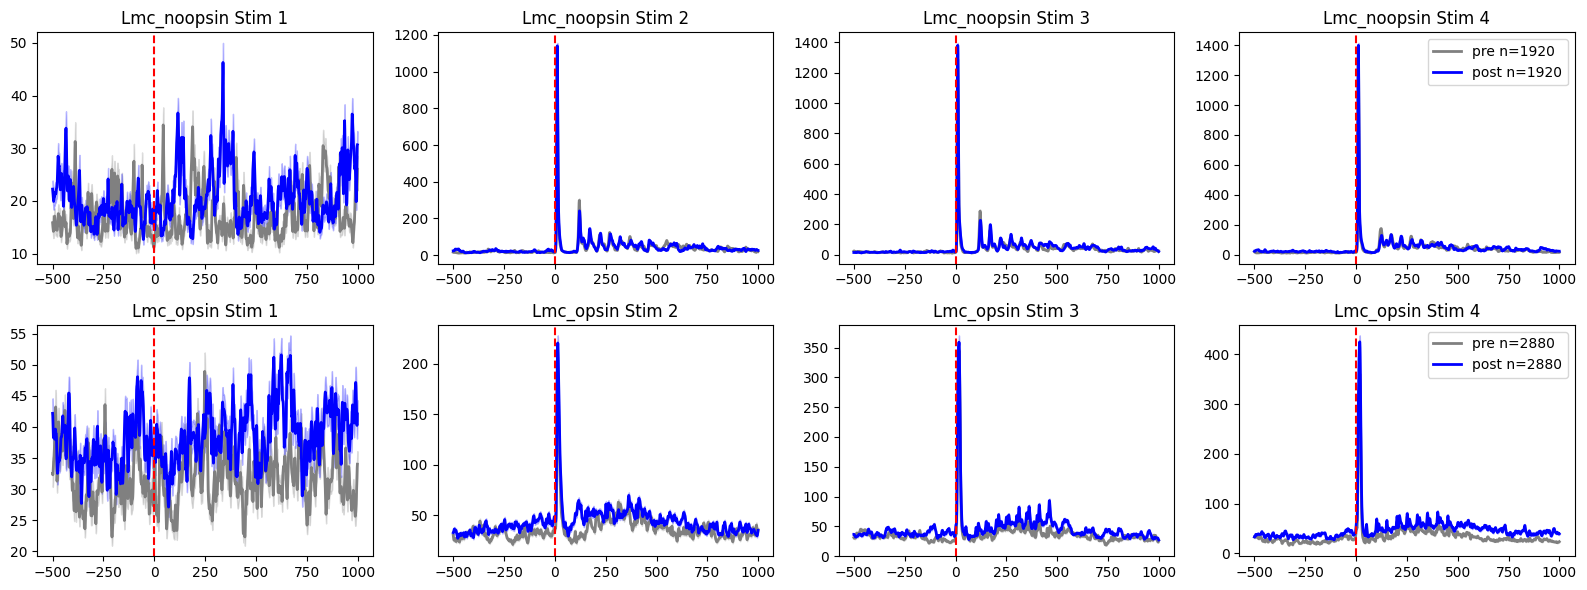

In [21]:
# 2) Point plotting code to run16
OUTPUT_BASE = Path('/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run16')

# 3) Run the group plot
plot_whisker_groups_prepost(stim_ids=[1,2,3,4], pre_trials=30, post_trials=30, channels="all")

### Beging regression analysis setup

## SpikeWindowAnalyzer (Whisker)

- Loads per-recording cache from `OUTPUT_BASE/<modality>/<group>/<recording>/`:
  - `trials.parquet`: trial-level metadata (`trial_idx`, `onset_s`, `offset_s`, `stim_id`)
  - `spikes_relative.npz`: `spikes_rel[ch, trial]` -> spike times (seconds) relative to onset

### compute_counts output (trial-level)
Columns (types):
- `recording` (str): recording name
- `group` (str): e.g., `Lmc_opsin`, `Lmc_noopsin`
- `stim_id` (int): raw stim ID from trials
- `stim_pooled` (str/int): pooled label per `stim_pool` (default: NoStim=1, Weak=2/3, Max=4)
- `trial_idx` (int): trial index from `trials.parquet`
- `trial_order_within_stim` (int): order within that stim_id
- `luciferin` (int): 0 = pre (first `pre_n` trials per stim), 1 = post (remaining trials)
- `channel` (int): channel index
- `baseline_window` (tuple of float): (start, end) seconds rel to onset
- `early_window` (tuple of float): (start, end) seconds rel to onset
- `late_window` (tuple of float): (start, end) seconds rel to onset
- `baseline_spikes` (int): spike count in `baseline_window`
- `early_spikes` (int): spike count in `early_window`
- `late_spikes` (int): spike count in `late_window`

### summarize_by_stim output (aggregated)
Grouped by (`group`, `recording`, `stim_pooled`, `channel`, `luciferin`):
- `baseline_mean` (float): mean baseline_spikes
- `early_mean` (float): mean early_spikes
- `late_mean` (float): mean late_spikes
- `n_trials` (int): number of trials contributing to the group


In [22]:
class SpikeWindowAnalyzer:
    def __init__(self, output_base, modality="Whisker"):
        self.output_base = Path(output_base)
        self.modality = modality

    def load_cache(self, group, rec):
        rec_dir = self.output_base / self.modality / group / rec
        trials = pd.read_parquet(rec_dir / "trials.parquet")
        spikes_rel = np.load(rec_dir / "spikes_relative.npz", allow_pickle=True)["spikes_rel"]
        print(f"[LOAD] rec_dir={rec_dir}")
        print(f"[DEBUG] trials shape={trials.shape}, columns={list(trials.columns)}, stim_ids={trials['stim_id'].unique().tolist()}")
        print(f"[DEBUG] spikes_rel shape={spikes_rel.shape}, dtype=object (times in seconds rel to onset)")
        return trials, spikes_rel

    def compute_counts(self, group, rec,
                       baseline=(-0.5, 0.0),
                       early=(0, 0.1),
                       late=(0.2, 1.0),
                       pre_n=30,
                       stim_pool=None,
                       add_rates=True):
        """
        baseline/early/late in seconds rel to onset.
        pre_n: first pre_n trials per stim -> luciferin=0 (pre), rest -> 1 (post).
        stim_pool: mapping pooled_name -> list of stim_ids; if None, default NoStim=1, Weak=2/3, Max=4.
        add_rates: if True, add rate and evoked columns.
        Returns a trial-level DataFrame.
        """
        trials, spikes_rel = self.load_cache(group, rec)
        stim_ids = trials["stim_id"].unique().tolist()

        if stim_pool is None:
            stim_pool = {"NoStim": [1], "Weak": [2, 3], "Max": [4]}
        pool_map = {s: name for name, lst in stim_pool.items() for s in lst}

        base_dur = baseline[1] - baseline[0]
        early_dur = early[1] - early[0]
        late_dur = late[1] - late[0]

        rows = []
        for stim in stim_ids:
            idx = trials.index[trials["stim_id"] == stim].to_list()
            for order, trial_idx in enumerate(idx):
                lucif = 0 if order < pre_n else 1
                for ch in range(spikes_rel.shape[0]):
                    st = spikes_rel[ch, trial_idx]
                    if st is None:
                        continue
                    st = np.asarray(st, dtype=float)
                    baseline_cnt = ((st >= baseline[0]) & (st < baseline[1])).sum()
                    early_cnt    = ((st >= early[0])    & (st < early[1])).sum()
                    late_cnt     = ((st >= late[0])     & (st < late[1])).sum()

                    row = {
                        "recording": rec,
                        "group": group,
                        "stim_id": int(stim),
                        "stim_pooled": pool_map.get(int(stim), stim),
                        "trial_idx": trial_idx,
                        "trial_order_within_stim": order,
                        "luciferin": lucif,  # 0=pre, 1=post
                        "channel": ch,
                        "baseline_window": baseline,
                        "early_window": early,
                        "late_window": late,
                        "baseline_spikes": int(baseline_cnt),
                        "early_spikes": int(early_cnt),
                        "late_spikes": int(late_cnt),
                    }
                    if add_rates:
                        baseline_rate = baseline_cnt / base_dur
                        early_rate    = early_cnt    / early_dur
                        late_rate     = late_cnt     / late_dur
                        row.update({
                            "baseline_rate": baseline_rate,
                            "early_rate": early_rate,
                            "late_rate": late_rate,
                            "early_evoked": early_rate - baseline_rate,
                            "late_evoked": late_rate - baseline_rate,
                        })
                    rows.append(row)
        df = pd.DataFrame(rows)
        print(f"[DEBUG] counts df shape={df.shape}, columns={df.columns.tolist()}")
        return df

    def summarize_by_stim(self, df):
        summary = (df.groupby(["group","recording","stim_pooled","channel","luciferin"], dropna=False)
                     .agg(baseline_mean=("baseline_spikes","mean"),
                          early_mean=("early_spikes","mean"),
                          late_mean=("late_spikes","mean"),
                          n_trials=("trial_idx","nunique"))
                     .reset_index())
        print(f"[DEBUG] summary shape={summary.shape}, columns={summary.columns.tolist()}")
        return summary

    def baseline_corrected_psth(self, group, rec, baseline=(-500, 0)):
        """
        Returns (fhz_corrected, tms, trials) with per-trial baseline mean subtracted.
        """
        rec_dir = self.output_base / self.modality / group / rec
        firing = np.load(rec_dir / "firing_tensor.npz")
        fhz, tms = firing["firing_hz"], firing["time_ms"]
        trials = pd.read_parquet(rec_dir / "trials.parquet")
        mask = (tms >= baseline[0]) & (tms < baseline[1])
        base_mean = fhz[:, :, mask].mean(axis=2, keepdims=True)
        fhz_corr = fhz - base_mean
        print(f"[DEBUG] fhz shape={fhz.shape}, baseline window={baseline}, corrected shape={fhz_corr.shape}")
        return fhz_corr, tms, trials

    def compute_counts_multi_late(self, group, rec,
                                  baseline=(-0.5, 0.0),
                                  early=(0, 0.1),
                                  late_windows=None,   # list of (start, end) seconds
                                  pre_n=30,
                                  stim_pool=None,
                                  add_rates=True,
                                  keep_legacy=True):
        """
        baseline/early in seconds rel to onset.
        late_windows: list of late windows; e.g. [(0.25,0.35), (0.35,0.5), (0.5,0.7), (0.7,1.0)]
        pre_n: first pre_n trials per stim -> luciferin=0 (pre), rest -> 1 (post).
        stim_pool: mapping pooled_name -> list of stim_ids; if None, default NoStim=1, Weak=2/3, Max=4.
        add_rates: if True, add rate/evoked columns for each late window.
        keep_legacy: if True, also fill late_spikes/late_rate/late_evoked from late_windows[0].
        Returns a trial-level DataFrame with added late window columns.
        """
        if late_windows is None:
            late_windows = [(0.2, 1.0)]  # legacy default
        trials, spikes_rel = self.load_cache(group, rec)
        stim_ids = trials["stim_id"].unique().tolist()

        if stim_pool is None:
            stim_pool = {"NoStim": [1], "Weak": [2, 3], "Max": [4]}
        pool_map = {s: name for name, lst in stim_pool.items() for s in lst}

        base_dur = baseline[1] - baseline[0]
        early_dur = early[1] - early[0]

        rows = []
        for stim in stim_ids:
            idx = trials.index[trials["stim_id"] == stim].to_list()
            for order, trial_idx in enumerate(idx):
                lucif = 0 if order < pre_n else 1
                for ch in range(spikes_rel.shape[0]):
                    st = spikes_rel[ch, trial_idx]
                    if st is None:
                        continue
                    st = np.asarray(st, dtype=float)
                    baseline_cnt = ((st >= baseline[0]) & (st < baseline[1])).sum()
                    early_cnt    = ((st >= early[0])    & (st < early[1])).sum()

                    row = {
                        "recording": rec,
                        "group": group,
                        "stim_id": int(stim),
                        "stim_pooled": pool_map.get(int(stim), stim),
                        "trial_idx": trial_idx,
                        "trial_order_within_stim": order,
                        "luciferin": lucif,
                        "channel": ch,
                        "baseline_window": baseline,
                        "early_window": early,
                        "baseline_spikes": int(baseline_cnt),
                        "early_spikes": int(early_cnt),
                    }

                    # rates/evoked for baseline & early
                    if add_rates:
                        baseline_rate = baseline_cnt / base_dur
                        early_rate    = early_cnt    / early_dur
                        row.update({
                            "baseline_rate": baseline_rate,
                            "early_rate": early_rate,
                            "early_evoked": early_rate - baseline_rate,
                        })

                    # per-late window
                    for i, lw in enumerate(late_windows, start=1):
                        lw_dur = lw[1] - lw[0]
                        lw_cnt = ((st >= lw[0]) & (st < lw[1])).sum()
                        row[f"late_spikes_L{i}"] = int(lw_cnt)
                        if add_rates:
                            lw_rate = lw_cnt / lw_dur
                            row[f"late_rate_L{i}"]  = lw_rate
                            row[f"late_evoked_L{i}"] = lw_rate - (baseline_cnt / base_dur)
                        # legacy fill from first late window
                        if keep_legacy and i == 1:
                            row["late_spikes"] = int(lw_cnt)
                            if add_rates:
                                row["late_rate"] = lw_rate
                                row["late_evoked"] = lw_rate - (baseline_cnt / base_dur)

                    rows.append(row)

        df = pd.DataFrame(rows)
        print(f"[DEBUG] multi-late df shape={df.shape}, columns={df.columns.tolist()}")
        return df

    def compute_counts_late_labeled(self, group, rec,
                                    baseline=(-0.5, 0.0),
                                    early=(0, 0.1),
                                    late_windows=None,   # dict label -> (start, end) seconds
                                    pre_n=30,
                                    stim_pool=None,
                                    add_rates=True,
                                    keep_legacy=True):
        """
        Like compute_counts_multi_late, but late windows are labeled.
        late_windows: dict label -> (start, end) in seconds, e.g. {"L2a":(0.20,0.30), "L2b":(0.30,0.40)}.
        pre_n: first pre_n trials per stim -> luciferin=0 (pre), rest -> 1 (post).
        stim_pool: mapping pooled_name -> list of stim_ids; if None, default NoStim=1, Weak=2/3, Max=4.
        add_rates: if True, add rate/evoked columns for each labeled late window.
        keep_legacy: if True, mirror the first labeled window into late_spikes/late_rate/late_evoked.
        """
        if late_windows is None:
            late_windows = {"L1": (0.2, 1.0)}
        trials, spikes_rel = self.load_cache(group, rec)
        stim_ids = trials["stim_id"].unique().tolist()

        if stim_pool is None:
            stim_pool = {"NoStim": [1], "Weak": [2, 3], "Max": [4]}
        pool_map = {s: name for name, lst in stim_pool.items() for s in lst}

        base_dur = baseline[1] - baseline[0]
        early_dur = early[1] - early[0]

        rows = []
        labels = list(late_windows.keys())
        for stim in stim_ids:
            idx = trials.index[trials["stim_id"] == stim].to_list()
            for order, trial_idx in enumerate(idx):
                lucif = 0 if order < pre_n else 1
                for ch in range(spikes_rel.shape[0]):
                    st = spikes_rel[ch, trial_idx]
                    if st is None:
                        continue
                    st = np.asarray(st, dtype=float)
                    baseline_cnt = ((st >= baseline[0]) & (st < baseline[1])).sum()
                    early_cnt    = ((st >= early[0])    & (st < early[1])).sum()

                    row = {
                        "recording": rec,
                        "group": group,
                        "stim_id": int(stim),
                        "stim_pooled": pool_map.get(int(stim), stim),
                        "trial_idx": trial_idx,
                        "trial_order_within_stim": order,
                        "luciferin": lucif,
                        "channel": ch,
                        "baseline_window": baseline,
                        "early_window": early,
                        "baseline_spikes": int(baseline_cnt),
                        "early_spikes": int(early_cnt),
                    }
                    if add_rates:
                        baseline_rate = baseline_cnt / base_dur
                        early_rate    = early_cnt    / early_dur
                        row.update({
                            "baseline_rate": baseline_rate,
                            "early_rate": early_rate,
                            "early_evoked": early_rate - baseline_rate,
                        })

                    # labeled late windows
                    for i, lbl in enumerate(labels):
                        lw = late_windows[lbl]
                        lw_dur = lw[1] - lw[0]
                        lw_cnt = ((st >= lw[0]) & (st < lw[1])).sum()
                        row[f"late_spikes_{lbl}"] = int(lw_cnt)
                        if add_rates:
                            lw_rate = lw_cnt / lw_dur
                            row[f"late_rate_{lbl}"]   = lw_rate
                            row[f"late_evoked_{lbl}"] = lw_rate - (baseline_cnt / base_dur)
                        if keep_legacy and i == 0:
                            row["late_spikes"] = int(lw_cnt)
                            if add_rates:
                                row["late_rate"]   = lw_rate
                                row["late_evoked"] = lw_rate - (baseline_cnt / base_dur)

                    rows.append(row)

        df = pd.DataFrame(rows)
        print(f"[DEBUG] labeled-late df shape={df.shape}, columns={df.columns.tolist()}")
        return df



In [23]:
OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")  # or run14_all, etc.
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")

# Trial-level counts with 0–100 ms early, 200–1000 ms late, pool stim2/3/4 into StimPresent
df_counts = ana.compute_counts(
    group="Lmc_opsin", rec="lmc_ch_1_3094_rec1",
    early=(0, 0.1), late=(0.2, 1.0),
    stim_pool={"StimPresent":[2,3,4], "NoStim":[1]},
    pre_n=30 # optional pre/post split by order
)


print(df_counts.head())
df_summary = ana.summarize_by_stim(df_counts)
print(df_summary.head())

[LOAD] rec_dir=/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17/Whisker/Lmc_opsin/lmc_ch_1_3094_rec1
[DEBUG] trials shape=(986, 3), columns=['onset_s', 'offset_s', 'stim_id'], stim_ids=[3, 2, 4, 1]
[DEBUG] spikes_rel shape=(32, 1000), dtype=object (times in seconds rel to onset)
[DEBUG] counts df shape=(31136, 19), columns=['recording', 'group', 'stim_id', 'stim_pooled', 'trial_idx', 'trial_order_within_stim', 'luciferin', 'channel', 'baseline_window', 'early_window', 'late_window', 'baseline_spikes', 'early_spikes', 'late_spikes', 'baseline_rate', 'early_rate', 'late_rate', 'early_evoked', 'late_evoked']
            recording      group  stim_id  stim_pooled  trial_idx  \
0  lmc_ch_1_3094_rec1  Lmc_opsin        3  StimPresent          0   
1  lmc_ch_1_3094_rec1  Lmc_opsin        3  StimPresent          0   
2  lmc_ch_1_3094_rec1  Lmc_opsin        3  StimPresent          0   
3  lmc_ch_1_3094_rec1  Lmc_opsin        3  StimPresent          0   
4  lmc_ch_1_3094_rec1  Lmc_opsin     

[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)


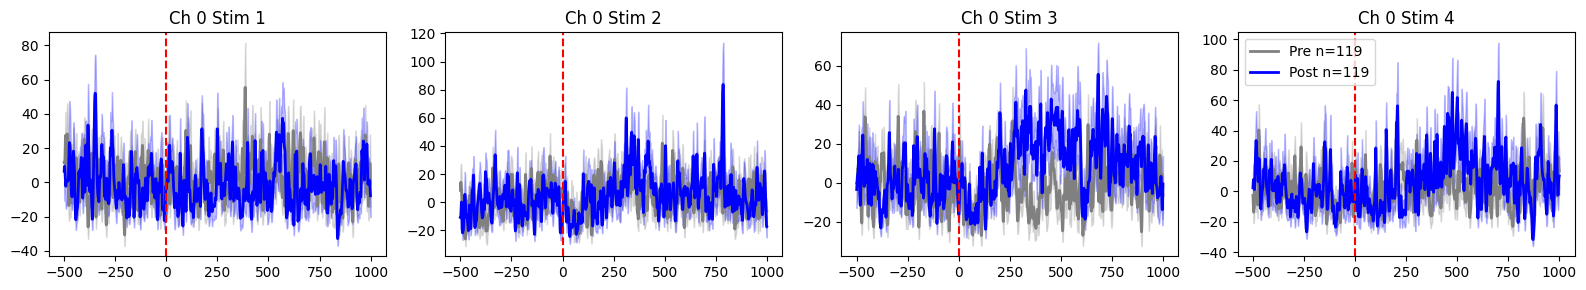

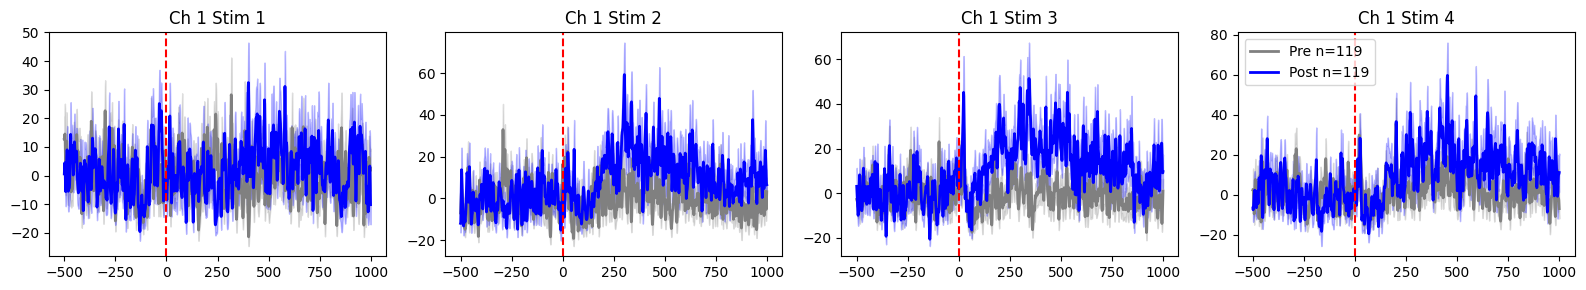

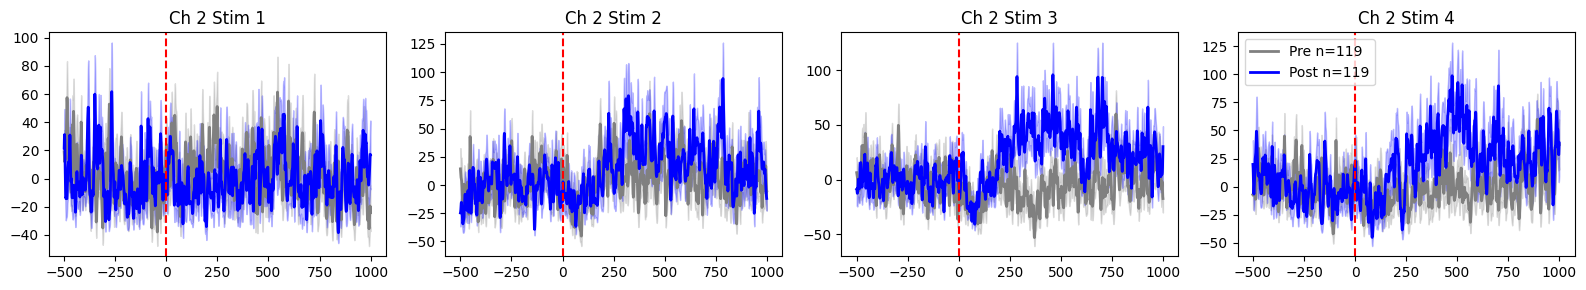

In [24]:
OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")

group = "Lmc_opsin"
rec   = "lmc_ch_1_3094_rec1"
stim_ids = [1,2,3,4]
channels = [0,1,2]  # or your good-channel list

fhz_corr, tms, trials = ana.baseline_corrected_psth(group, rec, baseline=(-500, 0))

import matplotlib.pyplot as plt
import numpy as np

for ch in channels:
    fig, axs = plt.subplots(1, len(stim_ids), figsize=(4*len(stim_ids), 3), squeeze=False)
    for si, stim in enumerate(stim_ids):
        ax = axs[0, si]
        idx_all = trials.index[trials["stim_id"] == stim].to_numpy()
        if idx_all.size == 0:
            ax.set_title(f"Stim {stim}: no trials"); continue
        # luciferin 0=pre, 1=post (as stored by compute_counts)
        pre_idx  = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 0)].to_numpy() if "luciferin" in trials else idx_all[:len(idx_all)//2]
        post_idx = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 1)].to_numpy() if "luciferin" in trials else idx_all[len(idx_all)//2:]

        for label, color, idx in [("Pre", "grey", pre_idx), ("Post", "blue", post_idx)]:
            if idx.size == 0: continue
            data = fhz_corr[ch, idx, :]
            mean = data.mean(axis=0)
            sem = data.std(axis=0) / np.sqrt(data.shape[0])
            ax.plot(tms, mean, color=color, lw=2, label=f"{label} n={idx.size}")
            ax.fill_between(tms, mean-sem, mean+sem, color=color, alpha=0.25)
        ax.axvline(0, color="red", ls="--")
        ax.set_title(f"Ch {ch} Stim {stim}")
        if si == len(stim_ids)-1: ax.legend()
    plt.tight_layout(); plt.show()


[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] fhz_corr shape=(32, 986, 1500), dtype=float64
[DEBUG] tms len=1500, range=(-500, 999)
[DEBUG] trials shape=(986, 3), columns=['onset_s', 'offset_s', 'stim_id']

[CHANNEL] 0
[DEBUG] stim 1: total trials 231
[DEBUG] stim 1: pre n=115, post n=116 (source: half/half fallback)
[DEBUG] stim 2: total trials 248
[DEBUG] stim 2: pre n=124, post n=124 (source: half/half fallback)
[DEBUG] stim 3: total trials 269
[DEBUG] stim 3: pre n=134, post n=135 (source: half/half fallback)
[DEBUG] stim 4: total trials 238
[DEBUG] stim 4: pre n=119, post n=119 (source: half/half fallback)


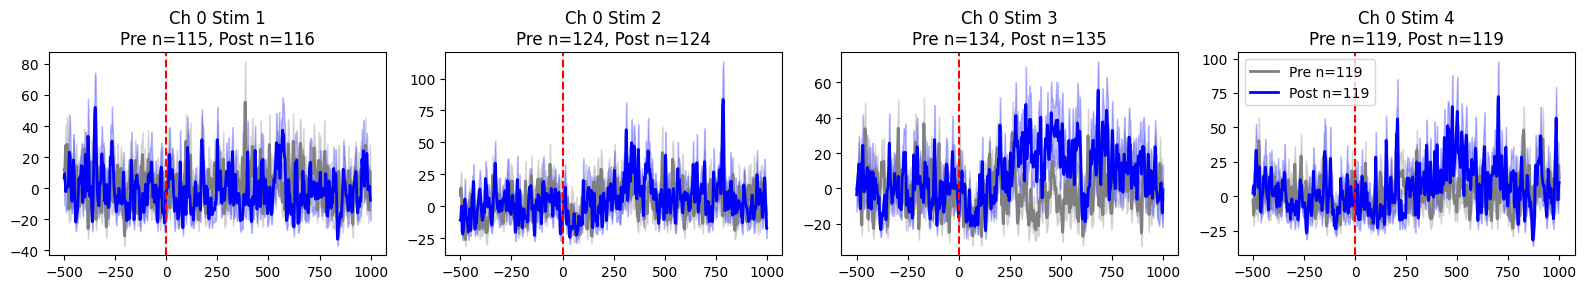


[CHANNEL] 1
[DEBUG] stim 1: total trials 231
[DEBUG] stim 1: pre n=115, post n=116 (source: half/half fallback)
[DEBUG] stim 2: total trials 248
[DEBUG] stim 2: pre n=124, post n=124 (source: half/half fallback)
[DEBUG] stim 3: total trials 269
[DEBUG] stim 3: pre n=134, post n=135 (source: half/half fallback)
[DEBUG] stim 4: total trials 238
[DEBUG] stim 4: pre n=119, post n=119 (source: half/half fallback)


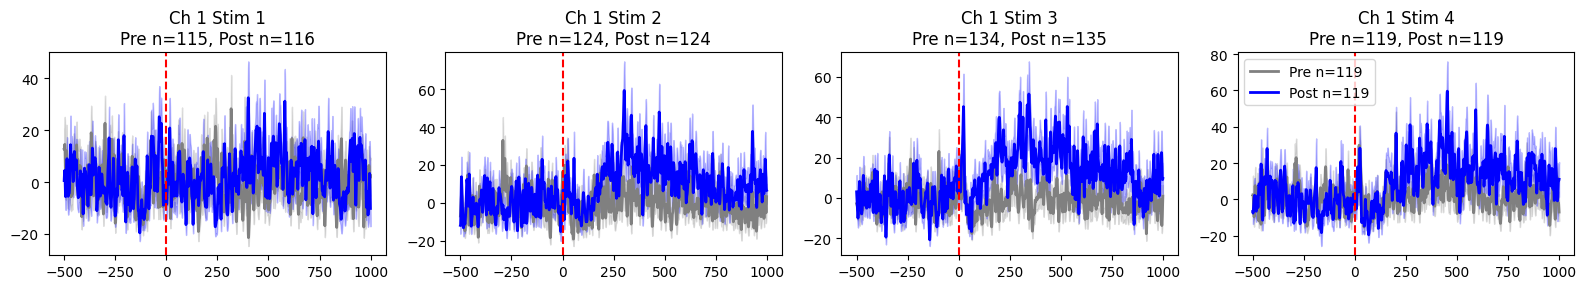


[CHANNEL] 2
[DEBUG] stim 1: total trials 231
[DEBUG] stim 1: pre n=115, post n=116 (source: half/half fallback)
[DEBUG] stim 2: total trials 248
[DEBUG] stim 2: pre n=124, post n=124 (source: half/half fallback)
[DEBUG] stim 3: total trials 269
[DEBUG] stim 3: pre n=134, post n=135 (source: half/half fallback)
[DEBUG] stim 4: total trials 238
[DEBUG] stim 4: pre n=119, post n=119 (source: half/half fallback)


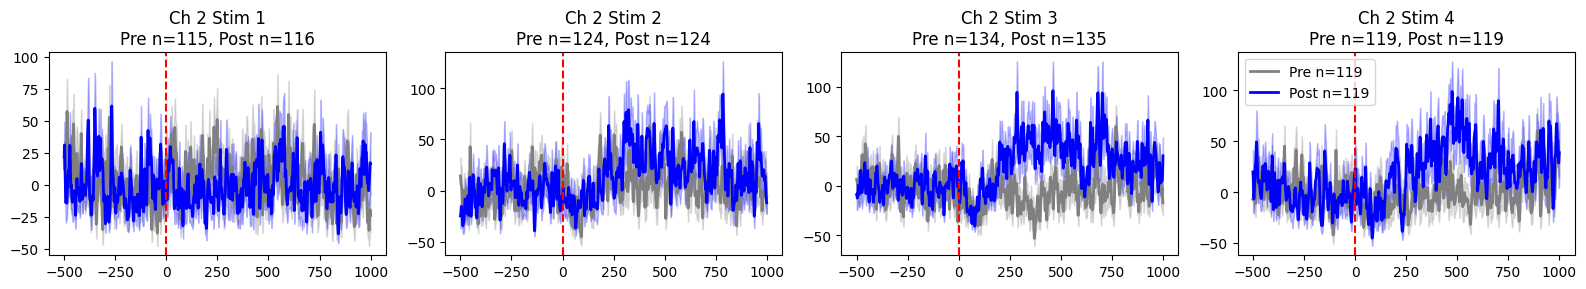

In [25]:
OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")

group = "Lmc_opsin"
rec   = "lmc_ch_1_3094_rec1"
stim_ids = [1,2,3,4]
channels = [0,1,2]  # or your good-channel list

fhz_corr, tms, trials = ana.baseline_corrected_psth(group, rec, baseline=(-500, 0))
print(f"[DEBUG] fhz_corr shape={fhz_corr.shape}, dtype={fhz_corr.dtype}")
print(f"[DEBUG] tms len={len(tms)}, range=({tms[0]}, {tms[-1]})")
print(f"[DEBUG] trials shape={trials.shape}, columns={trials.columns.tolist()}")

import matplotlib.pyplot as plt
import numpy as np

for ch in channels:
    print(f"\n[CHANNEL] {ch}")
    fig, axs = plt.subplots(1, len(stim_ids), figsize=(4*len(stim_ids), 3), squeeze=False)
    for si, stim in enumerate(stim_ids):
        ax = axs[0, si]
        idx_all = trials.index[trials["stim_id"] == stim].to_numpy()
        print(f"[DEBUG] stim {stim}: total trials {len(idx_all)}")
        if idx_all.size == 0:
            ax.set_title(f"Stim {stim}: no trials"); continue

        if "luciferin" in trials.columns:
            pre_idx  = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 0)].to_numpy()
            post_idx = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 1)].to_numpy()
            split_source = "luciferin column"
        else:
            half = len(idx_all)//2
            pre_idx, post_idx = idx_all[:half], idx_all[half:]
            split_source = "half/half fallback"

        print(f"[DEBUG] stim {stim}: pre n={len(pre_idx)}, post n={len(post_idx)} (source: {split_source})")

        for label, color, idx in [("Pre", "grey", pre_idx), ("Post", "blue", post_idx)]:
            if idx.size == 0: continue
            data = fhz_corr[ch, idx, :]  # trials x time
            mean = data.mean(axis=0)
            sem = data.std(axis=0) / np.sqrt(data.shape[0])
            ax.plot(tms, mean, color=color, lw=2, label=f"{label} n={idx.size}")
            ax.fill_between(tms, mean-sem, mean+sem, color=color, alpha=0.25)

        ax.axvline(0, color="red", ls="--")
        ax.set_title(f"Ch {ch} Stim {stim}\nPre n={len(pre_idx)}, Post n={len(post_idx)}")
        if si == len(stim_ids)-1:
            ax.legend()

    plt.tight_layout()
    plt.show()


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_psth_pre_post_modes(ana, group, rec, channels,
                             mode="individual",  # "individual" -> stim1..4, "pooled" -> NoStim/Weak/Max
                             weak_mode="2+3",    # "2+3" or "2"
                             max_mode="4",       # "4" or "3+4"
                             baseline=(-500, 0),
                             show_bottom=True):
    """
    Plots baseline-corrected PSTH pre/post. Top row = pre/post PSTH.
    Bottom row = same (duplicate) or disable via show_bottom=False.
    mode="individual": columns are stim 1,2,3,4 (if present)
    mode="pooled":     columns are NoStim (1), Weak (2+3 or 2), Max (4 or 3+4)
    """
    fhz_corr, tms, trials = ana.baseline_corrected_psth(group, rec, baseline=baseline)
    avail_stims = set(trials["stim_id"].unique().tolist())

    if mode == "individual":
        stim_groups = {f"Stim {s}": [s] for s in sorted(avail_stims)}
    else:
        weak_list = [2, 3] if weak_mode == "2+3" else [2]
        max_list  = [4] if max_mode == "4" else [3, 4]
        stim_groups = {
            "NoStim": [1],
            "Weak":   weak_list,
            "Max":    max_list,
        }
        stim_groups = {k:v for k,v in stim_groups.items() if avail_stims.intersection(v)}

    n_cols = len(stim_groups)
    n_rows = 2 if show_bottom else 1

    for ch in channels:
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), squeeze=False)
        for ci, (label, stim_list) in enumerate(stim_groups.items()):
            ax_top = axs[0, ci]
            ax_bot = axs[1, ci] if show_bottom else None

            idx_all = trials.index[trials["stim_id"].isin(stim_list)].to_numpy()
            if idx_all.size == 0:
                ax_top.set_title(f"{label}: no trials")
                if ax_bot is not None: ax_bot.axis("off")
                continue

            if "luciferin" in trials.columns:
                pre_idx  = trials.index[(trials["stim_id"].isin(stim_list)) & (trials["luciferin"] == 0)].to_numpy()
                post_idx = trials.index[(trials["stim_id"].isin(stim_list)) & (trials["luciferin"] == 1)].to_numpy()
                split_source = "luciferin column"
            else:
                half = len(idx_all)//2
                pre_idx, post_idx = idx_all[:half], idx_all[half:]
                split_source = "half/half fallback"

            pre_n, post_n = len(pre_idx), len(post_idx)
            print(f"[DEBUG] ch {ch} {label} stims={stim_list}: total {len(idx_all)}, pre {pre_n}, post {post_n} ({split_source})")

            # Top row: baseline-corrected PSTH pre/post
            for lab, color, idx in [("Pre", "grey", pre_idx), ("Post", "blue", post_idx)]:
                if idx.size == 0: continue
                data = fhz_corr[ch, idx, :]  # trials x time
                mean = data.mean(axis=0)
                sem = data.std(axis=0) / np.sqrt(data.shape[0])
                ax_top.plot(tms, mean, color=color, lw=2, label=f"{lab} n={idx.size}")
                ax_top.fill_between(tms, mean-sem, mean+sem, color=color, alpha=0.25)
            ax_top.axvline(0, color="red", ls="--")
            ax_top.set_title(f"{label}\nPre n={pre_n}, Post n={post_n}")
            if ci == n_cols-1:
                ax_top.legend()

            # Bottom row: optional duplicate of the top (counts PSTH again)
            if show_bottom:
                for lab, color, idx in [("Pre", "grey", pre_idx), ("Post", "blue", post_idx)]:
                    if idx.size == 0: continue
                    data = fhz_corr[ch, idx, :]
                    mean = data.mean(axis=0)
                    sem = data.std(axis=0) / np.sqrt(data.shape[0])
                    ax_bot.plot(tms, mean, color=color, lw=2)
                    ax_bot.fill_between(tms, mean-sem, mean+sem, color=color, alpha=0.25)
                ax_bot.axvline(0, color="red", ls="--")
                ax_bot.set_title("PSTH (baseline-corrected)")

        plt.tight_layout()
        plt.show()



[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] ch 0 Stim 1 stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 0 Stim 2 stims=[2]: total 248, pre 124, post 124 (half/half fallback)
[DEBUG] ch 0 Stim 3 stims=[3]: total 269, pre 134, post 135 (half/half fallback)
[DEBUG] ch 0 Stim 4 stims=[4]: total 238, pre 119, post 119 (half/half fallback)


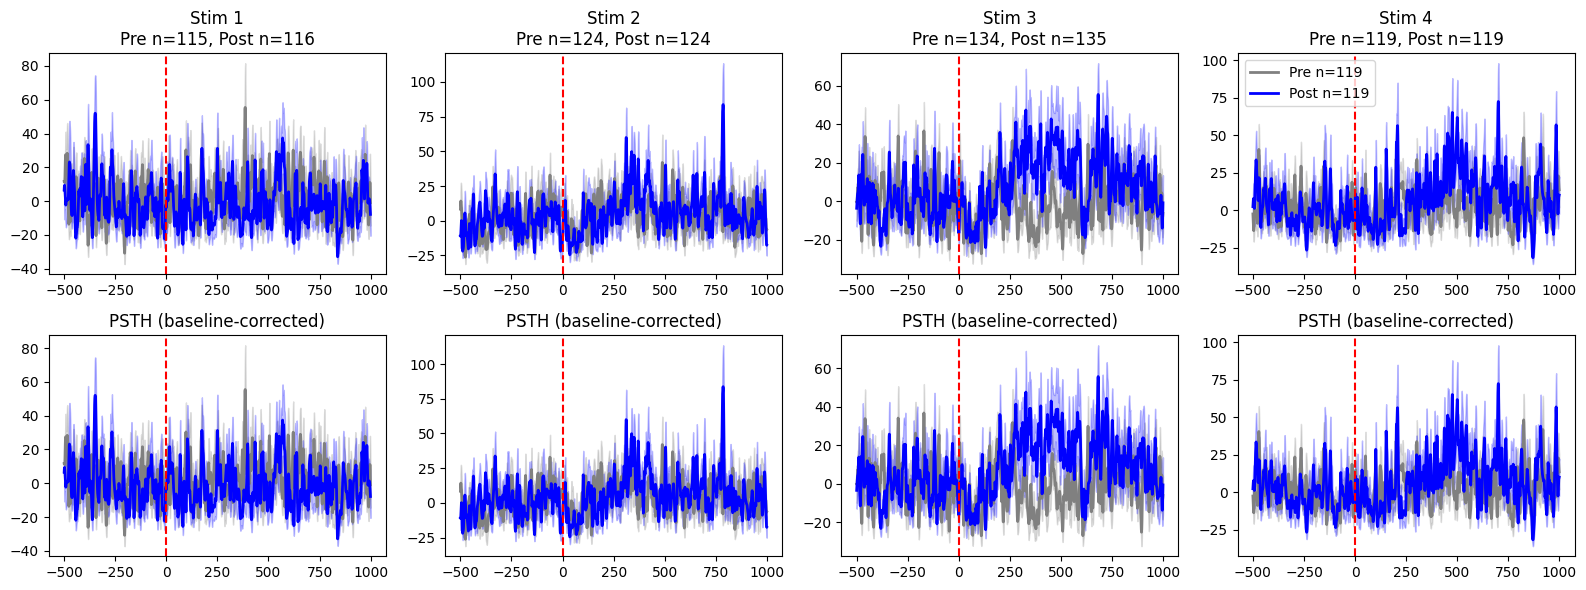

[DEBUG] ch 1 Stim 1 stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 1 Stim 2 stims=[2]: total 248, pre 124, post 124 (half/half fallback)
[DEBUG] ch 1 Stim 3 stims=[3]: total 269, pre 134, post 135 (half/half fallback)
[DEBUG] ch 1 Stim 4 stims=[4]: total 238, pre 119, post 119 (half/half fallback)


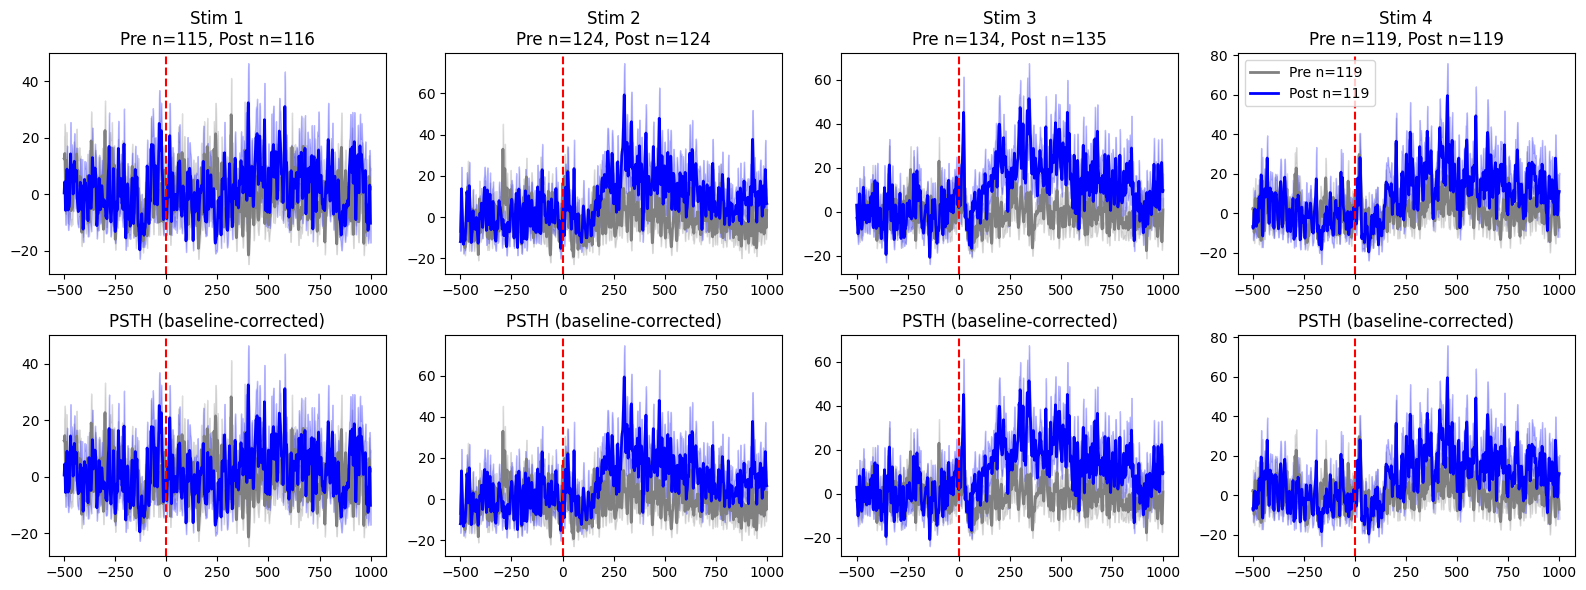

[DEBUG] ch 2 Stim 1 stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 2 Stim 2 stims=[2]: total 248, pre 124, post 124 (half/half fallback)
[DEBUG] ch 2 Stim 3 stims=[3]: total 269, pre 134, post 135 (half/half fallback)
[DEBUG] ch 2 Stim 4 stims=[4]: total 238, pre 119, post 119 (half/half fallback)


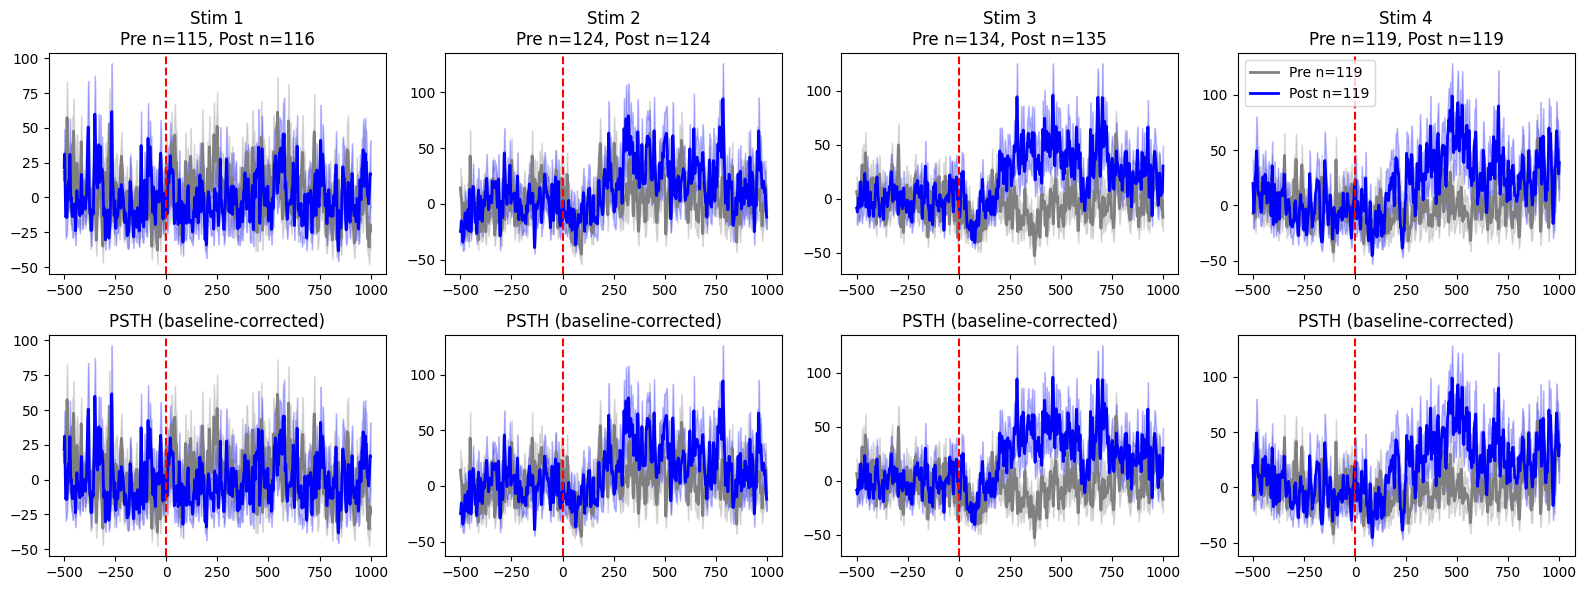

[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] ch 0 NoStim stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 0 Weak stims=[2, 3]: total 517, pre 258, post 259 (half/half fallback)
[DEBUG] ch 0 Max stims=[4]: total 238, pre 119, post 119 (half/half fallback)


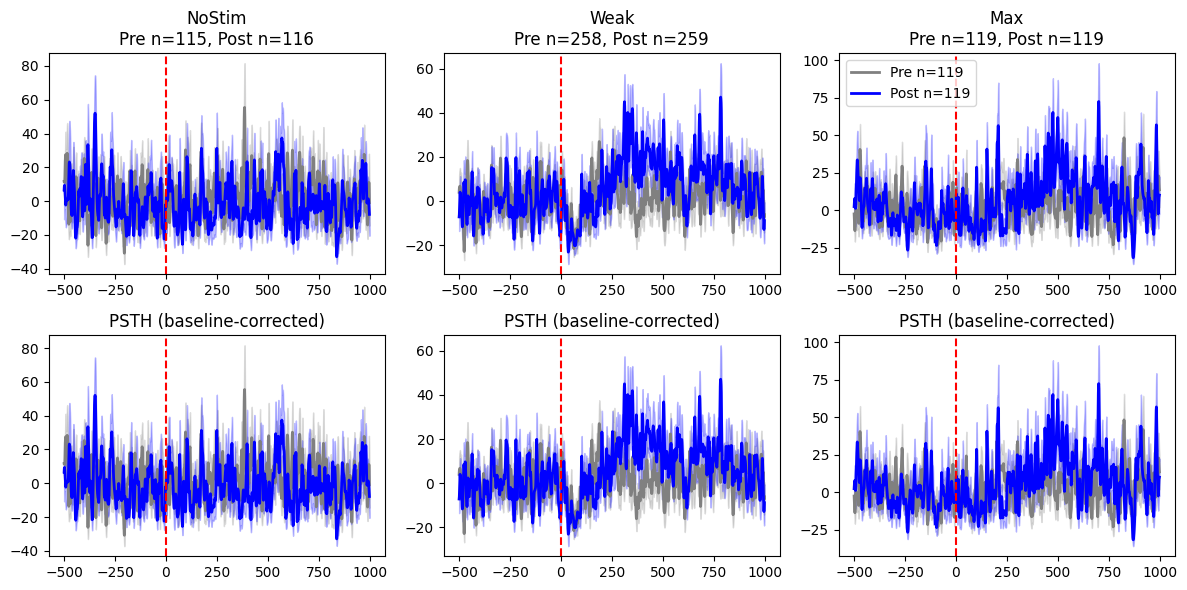

[DEBUG] ch 1 NoStim stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 1 Weak stims=[2, 3]: total 517, pre 258, post 259 (half/half fallback)
[DEBUG] ch 1 Max stims=[4]: total 238, pre 119, post 119 (half/half fallback)


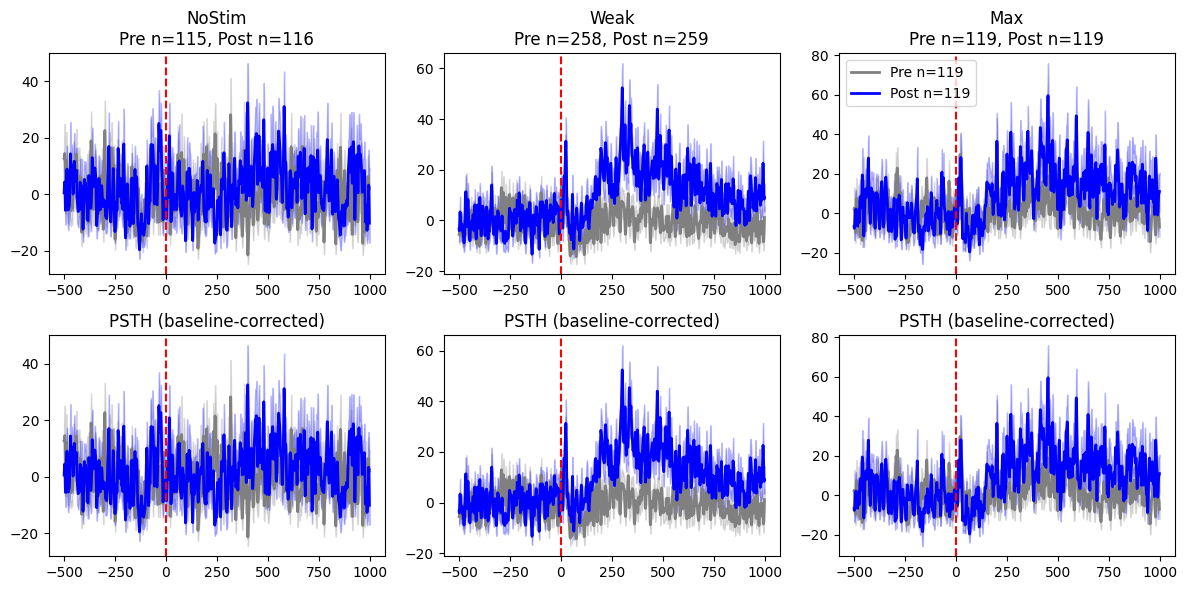

[DEBUG] ch 2 NoStim stims=[1]: total 231, pre 115, post 116 (half/half fallback)
[DEBUG] ch 2 Weak stims=[2, 3]: total 517, pre 258, post 259 (half/half fallback)
[DEBUG] ch 2 Max stims=[4]: total 238, pre 119, post 119 (half/half fallback)


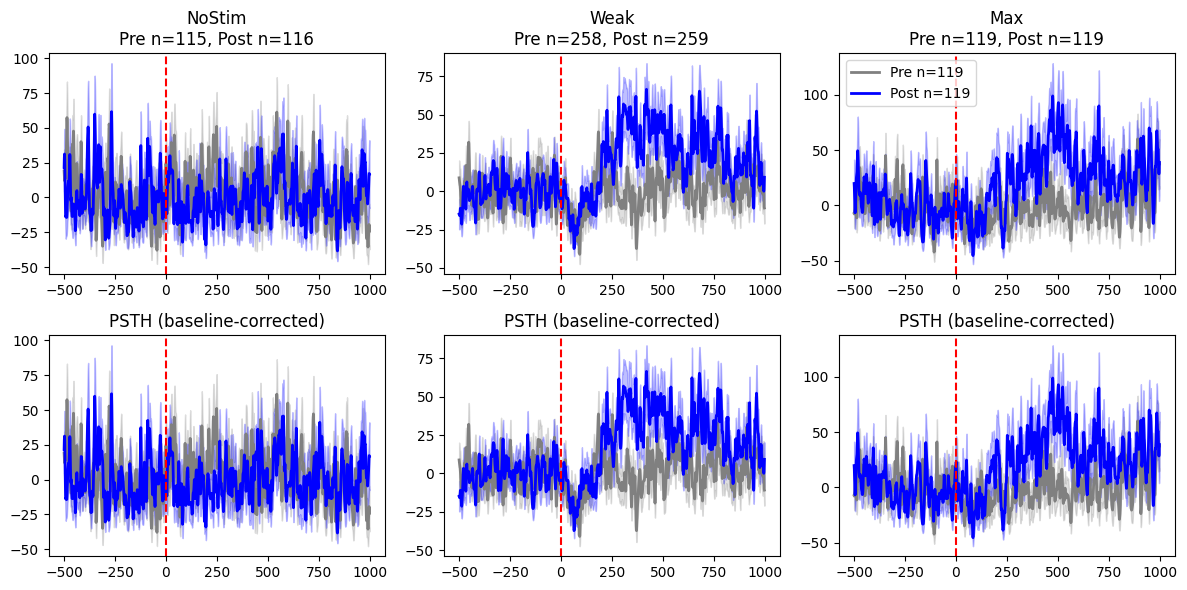

In [27]:
# Individual stims (1x4)
plot_psth_pre_post_modes(ana, "Lmc_opsin", "lmc_ch_1_3094_rec1",
                         channels=[0,1,2], mode="individual")

# Pooled stims (1x3): NoStim=1, Weak=2+3, Max=4
plot_psth_pre_post_modes(ana, "Lmc_opsin", "lmc_ch_1_3094_rec1",
                         channels=[0,1,2], mode="pooled",
                         weak_mode="2+3", max_mode="4")

[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] using 32 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[DEBUG] stim 1: pre n=115, post n=116
[DEBUG] stim 2: pre n=124, post n=124
[DEBUG] stim 3: pre n=134, post n=135
[DEBUG] stim 4: pre n=119, post n=119


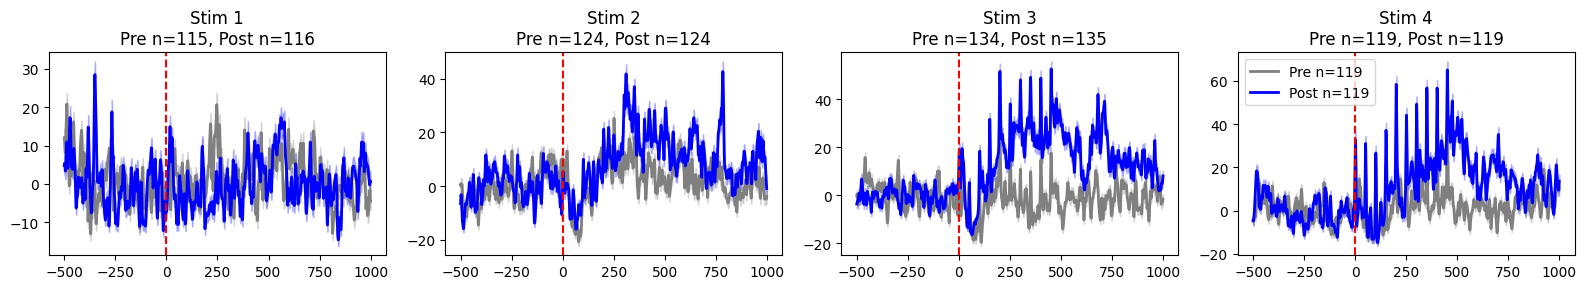

In [28]:
from pathlib import Path
import numpy as np, pandas as pd, matplotlib.pyplot as plt

OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")
DATA_ROOT   = Path("/Volumes/MannySSD/lmc_project_v2_MINIMAL")  # for good_channels

def get_good_channels(modality, group, rec):
    rr = pd.read_csv(DATA_ROOT / modality / "SpikeStuff" / "recording_results.csv")
    row = rr.query("group_name == @group and recording_name == @rec").iloc[0]
    return eval(row["good_channels"])

def plot_recording_mean(ana, modality, group, rec, stim_ids=(1,2,3,4), baseline=(-500,0)):
    chans = get_good_channels(modality, group, rec)
    fhz_corr, tms, trials = ana.baseline_corrected_psth(group, rec, baseline=baseline)
    print(f"[DEBUG] using {len(chans)} good channels: {chans}")

    fig, axs = plt.subplots(1, len(stim_ids), figsize=(4*len(stim_ids), 3), squeeze=False)
    for si, stim in enumerate(stim_ids):
        ax = axs[0, si]
        idx_all = trials.index[trials["stim_id"] == stim].to_numpy()
        if idx_all.size == 0:
            ax.set_title(f"Stim {stim}: no trials"); continue

        # pre/post split (luciferin column if present, else half/half)
        if "luciferin" in trials.columns:
            pre_idx  = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 0)].to_numpy()
            post_idx = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 1)].to_numpy()
        else:
            half = len(idx_all)//2
            pre_idx, post_idx = idx_all[:half], idx_all[half:]

        pre_n, post_n = len(pre_idx), len(post_idx)
        print(f"[DEBUG] stim {stim}: pre n={pre_n}, post n={post_n}")

        for label, color, idx in [("Pre","grey",pre_idx), ("Post","blue",post_idx)]:
            if idx.size == 0: continue
            # mean across channels then trials
            data = fhz_corr[chans][:, idx, :]         # ch x trials x time
            mean = data.mean(axis=(0,1))
            sem  = data.std(axis=(0,1)) / np.sqrt(data.shape[0]*data.shape[1])
            ax.plot(tms, mean, color=color, lw=2, label=f"{label} n={idx.size}")
            ax.fill_between(tms, mean-sem, mean+sem, color=color, alpha=0.25)

        ax.axvline(0, color="red", ls="--")
        ax.set_title(f"Stim {stim}\nPre n={pre_n}, Post n={post_n}")
        if si == len(stim_ids)-1: ax.legend()

    plt.tight_layout(); plt.show()

# Example usage
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")
plot_recording_mean(ana, modality="Whisker", group="Lmc_opsin", rec="lmc_ch_1_3094_rec1")



[INFO] Plotting Whisker/Lmc_opsin/lmc_ch_1_3094_rec1
[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] using 32 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[DEBUG] stim 1: pre n=115, post n=116
[DEBUG] stim 2: pre n=124, post n=124
[DEBUG] stim 3: pre n=134, post n=135
[DEBUG] stim 4: pre n=119, post n=119


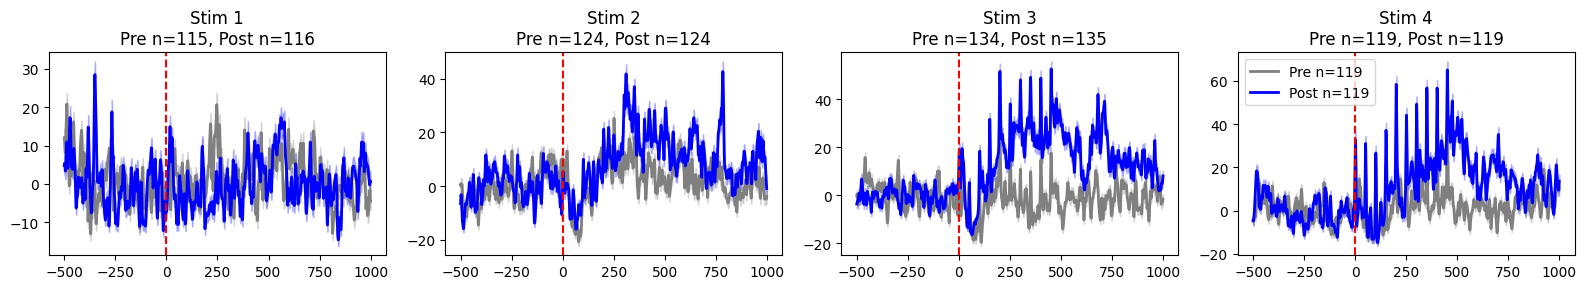


[INFO] Plotting Whisker/Lmc_opsin/lmc_ch_1_3094_rec2
[DEBUG] fhz shape=(32, 999, 1500), baseline window=(-500, 0), corrected shape=(32, 999, 1500)
[DEBUG] using 31 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[DEBUG] stim 1: pre n=125, post n=125
[DEBUG] stim 2: pre n=125, post n=125
[DEBUG] stim 3: pre n=116, post n=117
[DEBUG] stim 4: pre n=133, post n=133


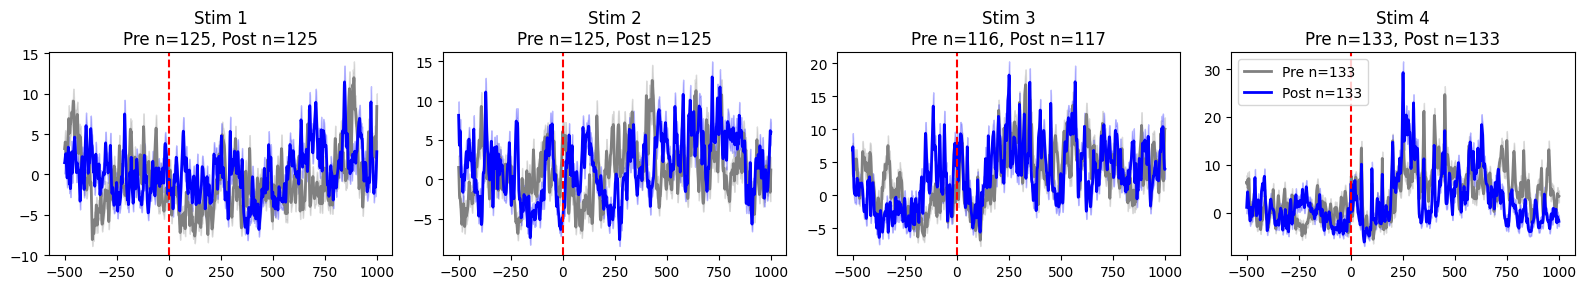


[INFO] Plotting Whisker/Lmc_opsin/lmc_ch_2_3093_rec1
[DEBUG] fhz shape=(32, 998, 1500), baseline window=(-500, 0), corrected shape=(32, 998, 1500)
[DEBUG] using 31 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[DEBUG] stim 1: pre n=119, post n=119
[DEBUG] stim 2: pre n=130, post n=130
[DEBUG] stim 3: pre n=115, post n=116
[DEBUG] stim 4: pre n=134, post n=135


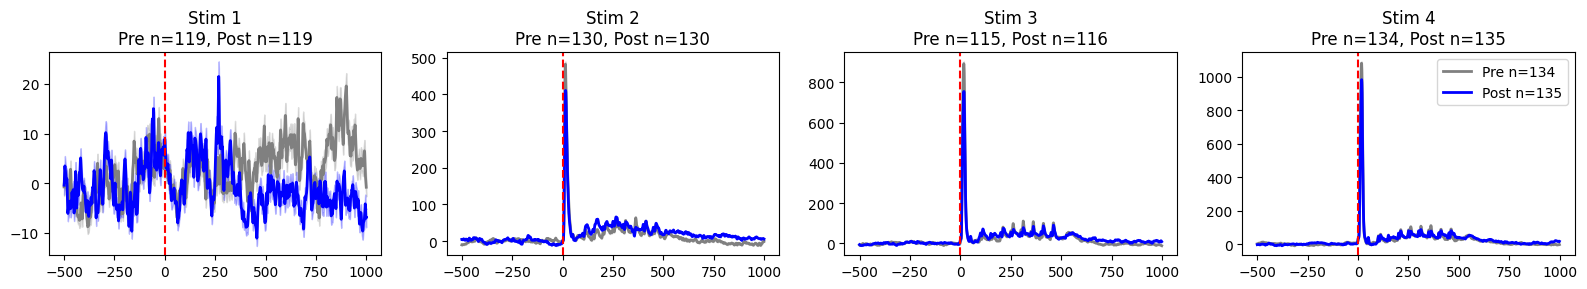


[INFO] Plotting Whisker/Lmc_noopsin/lmc_noch_1_3096_rec1
[DEBUG] fhz shape=(32, 999, 1500), baseline window=(-500, 0), corrected shape=(32, 999, 1500)
[DEBUG] using 31 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[DEBUG] stim 1: pre n=131, post n=132
[DEBUG] stim 2: pre n=116, post n=116
[DEBUG] stim 3: pre n=128, post n=129
[DEBUG] stim 4: pre n=123, post n=124


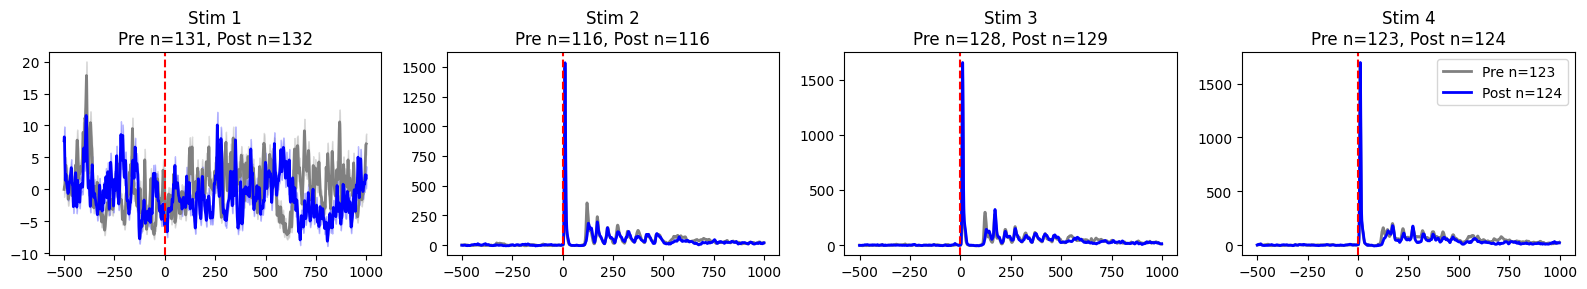


[INFO] Plotting Whisker/Lmc_noopsin/lmc_noch_1_3096_rec2
[DEBUG] fhz shape=(32, 991, 1500), baseline window=(-500, 0), corrected shape=(32, 991, 1500)
[DEBUG] using 31 good channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[DEBUG] stim 1: pre n=119, post n=119
[DEBUG] stim 2: pre n=125, post n=126
[DEBUG] stim 3: pre n=129, post n=130
[DEBUG] stim 4: pre n=121, post n=122


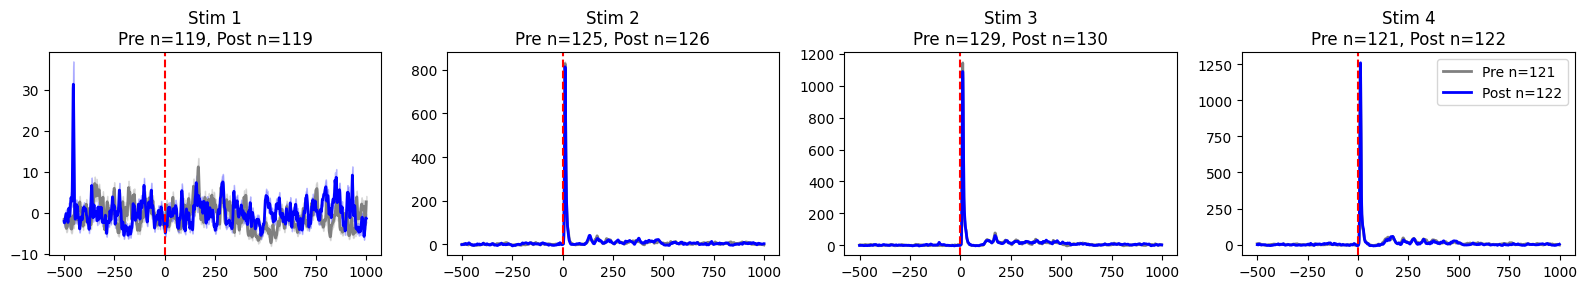

In [29]:
def plot_group_all_recordings(ana, modality, group, stim_ids=(1,2,3,4), baseline=(-500,0)):
    # Find all recordings for this group under OUTPUT_BASE/<modality>/<group>/*
    rec_dirs = sorted((ana.output_base / modality / group).glob("*"))
    if not rec_dirs:
        print(f"[WARN] No recordings found for {modality}/{group} under {ana.output_base}")
        return
    for rec_dir in rec_dirs:
        rec = rec_dir.name
        print(f"\n[INFO] Plotting {modality}/{group}/{rec}")
        plot_recording_mean(ana, modality=modality, group=group, rec=rec,
                            stim_ids=stim_ids, baseline=baseline)

# Example: loop all Whisker Lmc_opsin recordings in run17
ana = SpikeWindowAnalyzer(Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17"), modality="Whisker")
plot_group_all_recordings(ana, modality="Whisker", group="Lmc_opsin", stim_ids=[1,2,3,4], baseline=(-500,0))

# Example: loop all Whisker Lmc_noopsin
plot_group_all_recordings(ana, modality="Whisker", group="Lmc_noopsin", stim_ids=[1,2,3,4], baseline=(-500,0))


[DEBUG] fhz shape=(32, 999, 1500), baseline window=(-500, 0), corrected shape=(32, 999, 1500)
[DEBUG] fhz shape=(32, 991, 1500), baseline window=(-500, 0), corrected shape=(32, 991, 1500)
[DEBUG] fhz shape=(32, 986, 1500), baseline window=(-500, 0), corrected shape=(32, 986, 1500)
[DEBUG] fhz shape=(32, 999, 1500), baseline window=(-500, 0), corrected shape=(32, 999, 1500)
[DEBUG] fhz shape=(32, 998, 1500), baseline window=(-500, 0), corrected shape=(32, 998, 1500)


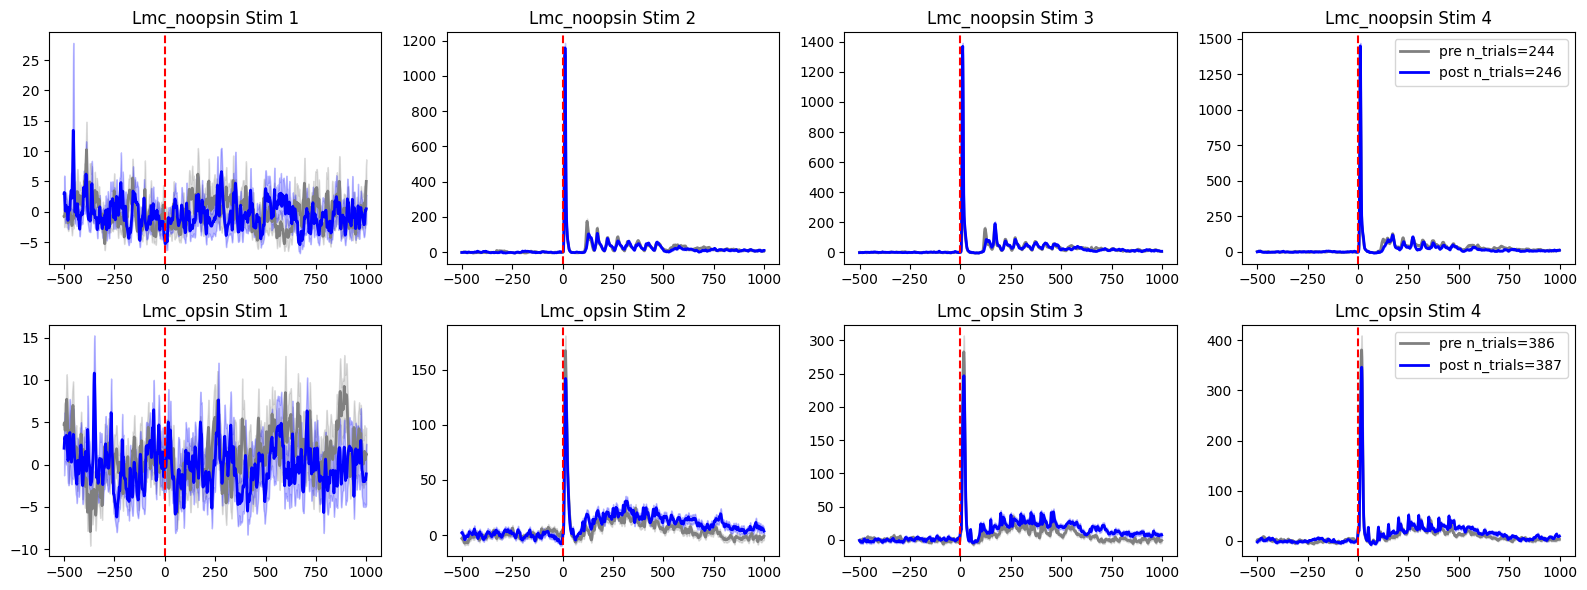

In [30]:
def plot_group_level_whisker(ana, stim_ids=(1,2,3,4), baseline=(-500,0)):
    """
    Pools all good channels across all Whisker recordings per group (Lmc_noopsin, Lmc_opsin)
    and plots group-level pre/post mean±SEM PSTHs for each stim.
    """
    groups = ["Lmc_noopsin", "Lmc_opsin"]
    tms_ref = None
    pooled = {g: {s: {"pre": [], "post": []} for s in stim_ids} for g in groups}

    for group in groups:
        rec_dirs = sorted((ana.output_base / "Whisker" / group).glob("*"))
        for rec_dir in rec_dirs:
            rec = rec_dir.name
            chans = get_good_channels("Whisker", group, rec)
            fhz_corr, tms, trials = ana.baseline_corrected_psth(group, rec, baseline=baseline)
            if tms_ref is None:
                tms_ref = tms
            for stim in stim_ids:
                idx_all = trials.index[trials["stim_id"] == stim].to_numpy()
                if idx_all.size == 0:
                    continue
                if "luciferin" in trials.columns:
                    pre_idx  = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 0)].to_numpy()
                    post_idx = trials.index[(trials["stim_id"] == stim) & (trials["luciferin"] == 1)].to_numpy()
                else:
                    half = len(idx_all)//2
                    pre_idx, post_idx = idx_all[:half], idx_all[half:]
                # Average over channels for this recording -> trials x time
                if len(pre_idx):
                    rec_pre = fhz_corr[chans][:, pre_idx, :].mean(axis=0)   # (trials, time)
                    pooled[group][stim]["pre"].append(rec_pre)
                if len(post_idx):
                    rec_post = fhz_corr[chans][:, post_idx, :].mean(axis=0)  # (trials, time)
                    pooled[group][stim]["post"].append(rec_post)

    # Plot group-level mean±SEM per stim
    fig, axs = plt.subplots(len(groups), len(stim_ids), figsize=(4*len(stim_ids), 3*len(groups)), squeeze=False)
    for gi, group in enumerate(groups):
        for si, stim in enumerate(stim_ids):
            ax = axs[gi, si]
            for label, color in [("pre","grey"), ("post","blue")]:
                arrs = pooled[group][stim][label]
                if not arrs:
                    continue
                # Concatenate trials across recordings after channel-averaging
                data = np.concatenate(arrs, axis=0)  # trials_total x time
                mean = data.mean(axis=0)
                sem  = data.std(axis=0) / np.sqrt(data.shape[0])
                ax.plot(tms_ref, mean, color=color, lw=2, label=f"{label} n_trials={data.shape[0]}")
                ax.fill_between(tms_ref, mean-sem, mean+sem, color=color, alpha=0.25)
            ax.axvline(0, color="red", ls="--")
            ax.set_title(f"{group} Stim {stim}")
            if si == len(stim_ids)-1:
                ax.legend()

    plt.tight_layout()
    plt.show()

plot_group_level_whisker(ana, stim_ids=[1,2,3,4], baseline=(-500,0))


# begin regression analyis with the dataframe

In [31]:
import statsmodels.api as sm
import pandas as pd

class SpikeRegression:
    def __init__(self, df_multi_all):
        self.df = df_multi_all.copy()

    # ----------------------------
    # Internal filters
    # ----------------------------
    def _filter_group(self, group=None):
        df = self.df
        if group is not None:
            df = df[df["group"] == group]
        return df

    def _filter_stim(self, stim_ids=None):
        df = self.df
        if stim_ids is not None:
            df = df[df["stim_id"].isin(stim_ids)]
        return df

    # ----------------------------
    # MODEL 1
    # ----------------------------
    def model1_late_evoked_vs_luciferin(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        verbose=True,
    ):
        df = self._filter_group(group)
        df = self._filter_stim(stim_ids)

        df = df.dropna(subset=[late_col, "luciferin"]).copy()
        if df.empty:
            if verbose:
                print("[WARN] Model 1: no rows after filtering.")
            return None, None

        pre = df[df.luciferin == 0][late_col]
        post = df[df.luciferin == 1][late_col]

        X = sm.add_constant(df["luciferin"])
        y = df[late_col]
        model = sm.OLS(y, X).fit()

        summary_row = pd.DataFrame([{
            "model": "model1",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "N_noLuc": len(pre),
            "N_Luc": len(post),
            "mean_noLuc": pre.mean(),
            "mean_Luc": post.mean(),
            "beta0": model.params["const"],
            "beta1": model.params["luciferin"],
            "p_beta1": model.pvalues["luciferin"],
        }])

        return model, summary_row

    # ----------------------------
    # MODEL 2
    # ----------------------------
    def model2_late_evoked_vs_early_and_luciferin(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        center_early=True,
        verbose=True,
    ):
        df = self._filter_group(group)
        df = self._filter_stim(stim_ids)

        df = df.dropna(subset=[late_col, "early_evoked", "luciferin"]).copy()
        if df.empty:
            if verbose:
                print("[WARN] Model 2: no rows after filtering.")
            return None, None

        if center_early:
            df["early_c"] = df["early_evoked"] - df["early_evoked"].mean()
            early_col = "early_c"
        else:
            early_col = "early_evoked"

        pre = df[df.luciferin == 0][late_col]
        post = df[df.luciferin == 1][late_col]

        X = sm.add_constant(df[[early_col, "luciferin"]])
        y = df[late_col]
        model = sm.OLS(y, X).fit()

        summary_row = pd.DataFrame([{
            "model": "model2",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "center_early": center_early,
            "N_noLuc": len(pre),
            "N_Luc": len(post),
            "beta0": model.params["const"],
            "beta1_early": model.params[early_col],
            "beta2_luciferin": model.params["luciferin"],
            "p_beta1_early": model.pvalues[early_col],
            "p_beta2_luciferin": model.pvalues["luciferin"],
        }])

        return model, summary_row
    
    def model3_late_evoked_early_luciferin_interaction(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        center_early=True,
        verbose=True,
    ):
        """
        Model 3:

            late_evoked =
                beta0
            + beta1 * early_evoked
            + beta2 * luciferin
            + beta3 * (early_evoked * luciferin)
            + eps
        """

        # ---- 1. Filter -----------------------------------------------------
        df = self._filter_group(group)
        df = self._filter_stim(stim_ids)
        
        df = df.dropna(subset=[late_col, "early_evoked", "luciferin"]).copy()
        if df.empty:
            if verbose:
                print("[WARN] Model 3: no rows after filtering.")
            return None, None

        # ---- 2. Center early ----------------------------------------------
        if center_early:
            df["early_c"] = df["early_evoked"] - df["early_evoked"].mean()
            early_col = "early_c"
        else:
            early_col = "early_evoked"

        # Interaction
        df["early_x_luc"] = df[early_col] * df["luciferin"]

        # ---- 3. OLS --------------------------------------------------------
        X = sm.add_constant(df[[early_col, "luciferin", "early_x_luc"]])
        y = df[late_col]
        model = sm.OLS(y, X).fit()

        if verbose:
            print(model.summary())

        # ---- 4. Summary row -----------------------------------------------
        summary_row = pd.DataFrame([{
            "model": "model3",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "center_early": center_early,
            "beta0": model.params["const"],
            "beta1_early": model.params[early_col],
            "beta2_luciferin": model.params["luciferin"],
            "beta3_interaction": model.params["early_x_luc"],
            "p_beta1_early": model.pvalues[early_col],
            "p_beta2_luciferin": model.pvalues["luciferin"],
            "p_beta3_interaction": model.pvalues["early_x_luc"],
        }])

        return model, summary_row

### 2.1 Baseline only (stim_id == 1)
Interpretation:
	•	Equation: late_evoked = beta0 + beta1 * luciferin + eps, restricted to stim_id 1
	•	beta0: mean late_evoked with no luciferin, no stim
	•	beta1: how luciferin changes late_evoked when there is no whisker stim

In [32]:
# Configure
OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")

def build_all_multi_late(ana,
                         modality="Whisker",
                         groups=("Lmc_noopsin","Lmc_opsin"),
                         late_windows=[(0.25,0.35), (0.35,0.5), (0.5,0.7), (0.7,1.0)],
                         baseline=(-0.5,0.0), early=(0,0.1), pre_n=30,
                         stim_pool={"NoStim":[1], "Weak":[2,3], "Max":[4]},
                         add_rates=True, keep_legacy=True):
    dfs = []
    for g in groups:
        rec_dirs = sorted((ana.output_base / modality / g).glob("*"))
        for rec_dir in rec_dirs:
            rec = rec_dir.name
            df = ana.compute_counts_multi_late(
                group=g, rec=rec,
                baseline=baseline, early=early,
                late_windows=late_windows,
                pre_n=pre_n, stim_pool=stim_pool,
                add_rates=add_rates, keep_legacy=keep_legacy
            )
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# Build the full multi-late trial-level table across all Whisker recordings
df_multi_all = build_all_multi_late(ana)
print("[INFO] combined shape:", df_multi_all.shape)
print(df_multi_all.head())

#print all unique column names in df_multi_all
print("Columns in df_multi_all:", df_multi_all.columns.tolist())
#print the unique group name in group column
print("Unique groups in df_multi_all:", df_multi_all['group'].unique())
#print the unique recording names in recording column
print("Unique recordings in df_multi_all:", df_multi_all['recording'].unique())


[LOAD] rec_dir=/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17/Whisker/Lmc_noopsin/lmc_noch_1_3096_rec1
[DEBUG] trials shape=(999, 3), columns=['onset_s', 'offset_s', 'stim_id'], stim_ids=[2, 1, 4, 3]
[DEBUG] spikes_rel shape=(32, 1000), dtype=object (times in seconds rel to onset)
[DEBUG] multi-late df shape=(31968, 30), columns=['recording', 'group', 'stim_id', 'stim_pooled', 'trial_idx', 'trial_order_within_stim', 'luciferin', 'channel', 'baseline_window', 'early_window', 'baseline_spikes', 'early_spikes', 'baseline_rate', 'early_rate', 'early_evoked', 'late_spikes_L1', 'late_rate_L1', 'late_evoked_L1', 'late_spikes', 'late_rate', 'late_evoked', 'late_spikes_L2', 'late_rate_L2', 'late_evoked_L2', 'late_spikes_L3', 'late_rate_L3', 'late_evoked_L3', 'late_spikes_L4', 'late_rate_L4', 'late_evoked_L4']
[LOAD] rec_dir=/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17/Whisker/Lmc_noopsin/lmc_noch_1_3096_rec2
[DEBUG] trials shape=(991, 3), columns=['onset_s', 'offset_s', 'stim_id

In [33]:
# A. Opsin group, weak stim (2+3), original late window
reg = SpikeRegression(df_multi_all)

m1, s1 = reg.model1_late_evoked_vs_luciferin(
    group="Lmc_opsin",
    stim_ids=[2, 3],
    late_col="late_evoked"
)
print(s1)

    model      group stim_ids     late_col  N_noLuc  N_Luc  mean_noLuc  \
0  model1  Lmc_opsin   [2, 3]  late_evoked     9536  69856   26.163381   

    mean_Luc      beta0     beta1   p_beta1  
0  27.577502  26.163381  1.414121  0.083154  


In [34]:
# B. Opsin group, weak stim, early late window (e.g. L1)
m1_L1, s1_L1 = reg.model1_late_evoked_vs_luciferin(
    group="Lmc_opsin",
    stim_ids=[2, 3],
    late_col="late_evoked_L1"
)
print(s1_L1)

    model      group stim_ids        late_col  N_noLuc  N_Luc  mean_noLuc  \
0  model1  Lmc_opsin   [2, 3]  late_evoked_L1     9536  69856   26.163381   

    mean_Luc      beta0     beta1   p_beta1  
0  27.577502  26.163381  1.414121  0.083154  


In [35]:
# C. Loop across late windows (this is the key next step)
rows = []

for late_col in ["late_evoked_L1", "late_evoked_L2",
                 "late_evoked_L3", "late_evoked_L4"]:
    _, s = reg.model1_late_evoked_vs_luciferin(
        group="Lmc_opsin",
        stim_ids=[2, 3],
        late_col=late_col,
        verbose=False
    )
    if s is not None:
        rows.append(s)

df_model1_time = pd.concat(rows, ignore_index=True)
print(df_model1_time)

    model      group stim_ids        late_col  N_noLuc  N_Luc  mean_noLuc  \
0  model1  Lmc_opsin   [2, 3]  late_evoked_L1     9536  69856   26.163381   
1  model1  Lmc_opsin   [2, 3]  late_evoked_L2     9536  69856   19.069911   
2  model1  Lmc_opsin   [2, 3]  late_evoked_L3     9536  69856   14.234899   
3  model1  Lmc_opsin   [2, 3]  late_evoked_L4     9536  69856    4.628845   

    mean_Luc      beta0     beta1       p_beta1  
0  27.577502  26.163381  1.414121  8.315397e-02  
1  24.261538  19.069911  5.191628  1.963088e-13  
2  14.293819  14.234899  0.058919  9.217677e-01  
3   7.541619   4.628845  2.912774  1.926158e-08  


### Model 2

In [36]:
reg = SpikeRegression(df_multi_all)

late_cols = [
    "late_evoked_L1",
    "late_evoked_L2",
    "late_evoked_L3",
    "late_evoked_L4",
]

rows = []

for late_col in late_cols:
    _, s = reg.model2_late_evoked_vs_early_and_luciferin(
        group="Lmc_opsin",
        stim_ids=[2, 3],
        late_col=late_col,
        center_early=True,
        verbose=False,
    )
    if s is not None:
        rows.append(s)

df_model2_time = pd.concat(rows, ignore_index=True)
print(df_model2_time)

    model      group stim_ids        late_col  center_early  N_noLuc  N_Luc  \
0  model2  Lmc_opsin   [2, 3]  late_evoked_L1          True     9536  69856   
1  model2  Lmc_opsin   [2, 3]  late_evoked_L2          True     9536  69856   
2  model2  Lmc_opsin   [2, 3]  late_evoked_L3          True     9536  69856   
3  model2  Lmc_opsin   [2, 3]  late_evoked_L4          True     9536  69856   

       beta0  beta1_early  beta2_luciferin  p_beta1_early  p_beta2_luciferin  
0  26.481327     0.388658         1.052773            0.0       1.522503e-01  
1  19.369432     0.366136         4.851219            0.0       6.532592e-15  
2  14.430257     0.238805        -0.163106            0.0       7.705049e-01  
3   4.750665     0.148913         2.774325            0.0       2.946266e-08  


### model 3

In [37]:
late_cols = [
    "late_evoked_L1",
    "late_evoked_L2",
    "late_evoked_L3",
    "late_evoked_L4",
]

rows = []

for late_col in late_cols:
    _, s = reg.model3_late_evoked_early_luciferin_interaction(
        group="Lmc_opsin",
        stim_ids=[2, 3],
        late_col=late_col,
        center_early=True,
        verbose=False,
    )
    if s is not None:
        rows.append(s)

df_model3_time = pd.concat(rows, ignore_index=True)
df_model3_time

model      group stim_ids        late_col  center_early      beta0  \
0  model3  Lmc_opsin   [2, 3]  late_evoked_L1          True  26.479197   
1  model3  Lmc_opsin   [2, 3]  late_evoked_L2          True  19.337178   
2  model3  Lmc_opsin   [2, 3]  late_evoked_L3          True  14.440426   
3  model3  Lmc_opsin   [2, 3]  late_evoked_L4          True   4.738735   

   beta1_early  beta2_luciferin  beta3_interaction  p_beta1_early  \
0     0.386054         1.054864           0.002950   0.000000e+00   
1     0.326709         4.882886           0.044675   0.000000e+00   
2     0.251236        -0.173091          -0.014086   0.000000e+00   
3     0.134330         2.786037           0.016524  6.359680e-123   

   p_beta2_luciferin  p_beta3_interaction  
0       1.514551e-01         7.402443e-01  
1       4.313457e-15         2.978329e-09  
2       7.568905e-01         3.734904e-02  
3       2.576427e-08         6.344990e-03

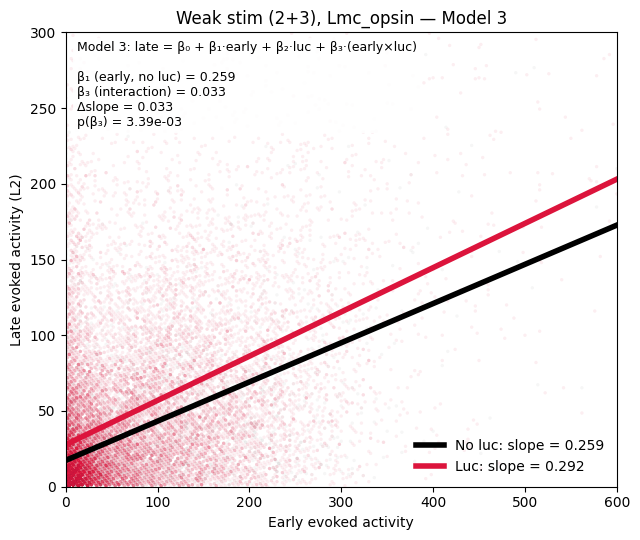

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --------------------------------------------------
# Subset data: opsin group, weak stim (2+3), L2
# --------------------------------------------------
df_plot = df_multi_all[
    (df_multi_all["group"] == "Lmc_opsin") &
    (df_multi_all["stim_id"].isin([2, 3]))
].dropna(subset=["early_evoked", "late_evoked_L2", "luciferin"]).copy()

# Optional: focus visual on positive evoked regime
df_plot = df_plot[
    (df_plot["early_evoked"] >= 0) &
    (df_plot["late_evoked_L2"] >= 0)
]

# --------------------------------------------------
# Fit Model 3 exactly as in analysis
# --------------------------------------------------
df_plot["early_c"] = df_plot["early_evoked"] - df_plot["early_evoked"].mean()
df_plot["early_x_luc"] = df_plot["early_c"] * df_plot["luciferin"]

X = sm.add_constant(df_plot[["early_c", "luciferin", "early_x_luc"]])
y = df_plot["late_evoked_L2"]
model = sm.OLS(y, X).fit()

# Extract coefficients
b0 = model.params["const"]
b1 = model.params["early_c"]
b2 = model.params["luciferin"]
b3 = model.params["early_x_luc"]

p_b3 = model.pvalues["early_x_luc"]

# Slopes
slope_no = b1
slope_luc = b1 + b3

# Intercepts at early = 0
early_mean = df_plot["early_evoked"].mean()
intercept_no = b0 - b1 * early_mean
intercept_luc = (b0 + b2) - (b1 + b3) * early_mean

# --------------------------------------------------
# Plot
# --------------------------------------------------
plt.figure(figsize=(6.5, 5.5))

# Scatter (background)
plt.scatter(
    df_plot.loc[df_plot.luciferin == 0, "early_evoked"],
    df_plot.loc[df_plot.luciferin == 0, "late_evoked_L2"],
    s=6, alpha=0.07, color="gray", edgecolors="none"
)

plt.scatter(
    df_plot.loc[df_plot.luciferin == 1, "early_evoked"],
    df_plot.loc[df_plot.luciferin == 1, "late_evoked_L2"],
    s=6, alpha=0.07, color="crimson", edgecolors="none"
)

# Regression lines from Model 3
x_range = np.linspace(0, 600, 300)
plt.plot(
    x_range,
    intercept_no + slope_no * x_range,
    color="black", linewidth=4,
    label=f"No luc: slope = {slope_no:.3f}"
)

plt.plot(
    x_range,
    intercept_luc + slope_luc * x_range,
    color="crimson", linewidth=4,
    label=f"Luc: slope = {slope_luc:.3f}"
)

# Axes
plt.xlim(0, 600)
plt.ylim(0, 300)
plt.xlabel("Early evoked activity")
plt.ylabel("Late evoked activity (L2)")
plt.title("Weak stim (2+3), Lmc_opsin — Model 3")

# Legend
plt.legend(frameon=False)

# --------------------------------------------------
# Annotation box (key stats)
# --------------------------------------------------
text = (
    f"Model 3: late = β₀ + β₁·early + β₂·luc + β₃·(early×luc)\n\n"
    f"β₁ (early, no luc) = {b1:.3f}\n"
    f"β₃ (interaction) = {b3:.3f}\n"
    f"Δslope = {b3:.3f}\n"
    f"p(β₃) = {p_b3:.2e}"
)

plt.text(
    0.02, 0.98, text,
    transform=plt.gca().transAxes,
    ha="left", va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)
)

plt.tight_layout()
plt.show()


===== FULL MODEL (TABLE / CANONICAL) =====
β1 (early, no luc)   = 0.276455
β3 (interaction)     = 0.048032
Δslope               = 0.048032
p(β3)                = 3.310e-08
Slope no-luc         = 0.276455
Slope luc            = 0.324487

===== PLOTTED-SUBSET MODEL (FOR DIAGNOSTICS ONLY) =====
β1 (early, no luc)   = 0.207578
β3 (interaction)     = 0.048033
Δslope               = 0.048033
p(β3)                = 1.753e-05
Slope no-luc         = 0.207578
Slope luc            = 0.255611


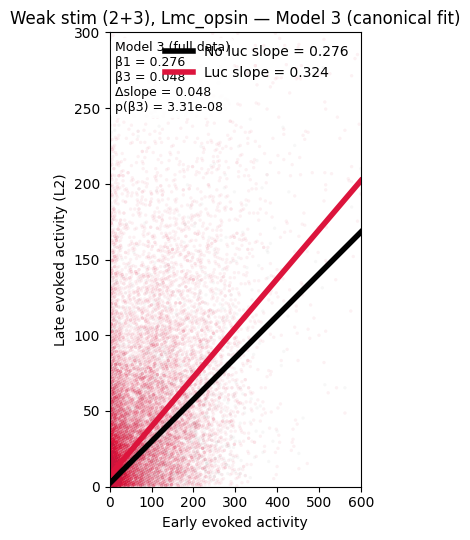

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --------------------------------------------------
# 1. FULL DATASET (canonical analysis)
# --------------------------------------------------
df_full = df_multi_all[
    (df_multi_all["group"] == "Lmc_opsin") &
    (df_multi_all["stim_id"].isin([2, 3]))
].dropna(subset=["early_evoked", "late_evoked_L2", "luciferin"]).copy()

df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

X_full = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
y_full = df_full["late_evoked_L2"]
model_full = sm.OLS(y_full, X_full).fit()

# Extract canonical coefficients
b0_f = model_full.params["const"]
b1_f = model_full.params["early_c"]
b2_f = model_full.params["luciferin"]
b3_f = model_full.params["early_x_luc"]

# Slopes
slope_no_f = b1_f
slope_luc_f = b1_f + b3_f

# Intercepts at early = 0
early_mean = df_full["early_evoked"].mean()
int_no_f = b0_f - b1_f * early_mean
int_luc_f = (b0_f + b2_f) - (b1_f + b3_f) * early_mean

print("\n===== FULL MODEL (TABLE / CANONICAL) =====")
print(f"β1 (early, no luc)   = {b1_f:.6f}")
print(f"β3 (interaction)     = {b3_f:.6f}")
print(f"Δslope               = {b3_f:.6f}")
print(f"p(β3)                = {model_full.pvalues['early_x_luc']:.3e}")
print(f"Slope no-luc         = {slope_no_f:.6f}")
print(f"Slope luc            = {slope_luc_f:.6f}")

# --------------------------------------------------
# 2. PLOTTED SUBSET ONLY (for comparison)
# --------------------------------------------------
df_plot = df_full[
    (df_full["early_evoked"] >= 0) &
    (df_full["early_evoked"] <= 600) &
    (df_full["late_evoked_L2"] >= 0) &
    (df_full["late_evoked_L2"] <= 300)
].copy()

df_plot["early_c"] = df_plot["early_evoked"] - df_plot["early_evoked"].mean()
df_plot["early_x_luc"] = df_plot["early_c"] * df_plot["luciferin"]

X_plot = sm.add_constant(df_plot[["early_c", "luciferin", "early_x_luc"]])
y_plot = df_plot["late_evoked_L2"]
model_plot = sm.OLS(y_plot, X_plot).fit()

print("\n===== PLOTTED-SUBSET MODEL (FOR DIAGNOSTICS ONLY) =====")
print(f"β1 (early, no luc)   = {model_plot.params['early_c']:.6f}")
print(f"β3 (interaction)     = {model_plot.params['early_x_luc']:.6f}")
print(f"Δslope               = {model_plot.params['early_x_luc']:.6f}")
print(f"p(β3)                = {model_plot.pvalues['early_x_luc']:.3e}")
print(f"Slope no-luc         = {model_plot.params['early_c']:.6f}")
print(f"Slope luc            = {model_plot.params['early_c'] + model_plot.params['early_x_luc']:.6f}")

# --------------------------------------------------
# 3. PLOT USING FULL-MODEL COEFFICIENTS (CORRECT)
# --------------------------------------------------
x_range = np.linspace(0, 600, 300)

plt.figure(figsize=(3.5, 5.5))

# Scatter (background only)
plt.scatter(
    df_plot.loc[df_plot.luciferin == 0, "early_evoked"],
    df_plot.loc[df_plot.luciferin == 0, "late_evoked_L2"],
    s=6, alpha=0.06, color="gray", edgecolors="none"
)

plt.scatter(
    df_plot.loc[df_plot.luciferin == 1, "early_evoked"],
    df_plot.loc[df_plot.luciferin == 1, "late_evoked_L2"],
    s=6, alpha=0.06, color="crimson", edgecolors="none"
)

# Regression lines FROM FULL MODEL
plt.plot(
    x_range,
    int_no_f + slope_no_f * x_range,
    color="black", linewidth=4,
    label=f"No luc slope = {slope_no_f:.3f}"
)

plt.plot(
    x_range,
    int_luc_f + slope_luc_f * x_range,
    color="crimson", linewidth=4,
    label=f"Luc slope = {slope_luc_f:.3f}"
)

plt.xlim(0, 600)
plt.ylim(0, 300)
plt.xlabel("Early evoked activity")
plt.ylabel("Late evoked activity (L2)")
plt.title("Weak stim (2+3), Lmc_opsin — Model 3 (canonical fit)")
plt.legend(frameon=False)

# Stats annotation (FULL MODEL)
text = (
    f"Model 3 (full data)\n"
    f"β1 = {b1_f:.3f}\n"
    f"β3 = {b3_f:.3f}\n"
    f"Δslope = {b3_f:.3f}\n"
    f"p(β3) = {model_full.pvalues['early_x_luc']:.2e}"
)

plt.text(
    0.02, 0.98, text,
    transform=plt.gca().transAxes,
    ha="left", va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)
)

plt.tight_layout()
plt.show()

In [40]:
import statsmodels.api as sm
import numpy as np

# --------------------------------------------------
# FULL DATASET: no-opsin group, weak stim (2+3), L2
# --------------------------------------------------
df_full_no = df_multi_all[
    (df_multi_all["group"] == "Lmc_noopsin") &
    (df_multi_all["stim_id"].isin([2, 3]))
].dropna(subset=["early_evoked", "late_evoked_L2", "luciferin"]).copy()

# Center early (same as opsin)
df_full_no["early_c"] = df_full_no["early_evoked"] - df_full_no["early_evoked"].mean()
df_full_no["early_x_luc"] = df_full_no["early_c"] * df_full_no["luciferin"]

X_no = sm.add_constant(df_full_no[["early_c", "luciferin", "early_x_luc"]])
y_no = df_full_no["late_evoked_L2"]
model_no = sm.OLS(y_no, X_no).fit()

# Extract coefficients
b0_no = model_no.params["const"]
b1_no = model_no.params["early_c"]
b2_no = model_no.params["luciferin"]
b3_no = model_no.params["early_x_luc"]

print("\n===== FULL MODEL (NO OPSIN) =====")
print(f"β1 (early, no luc)   = {b1_no:.6f}")
print(f"β3 (interaction)     = {b3_no:.6f}")
print(f"Δslope               = {b3_no:.6f}")
print(f"p(β3)                = {model_no.pvalues['early_x_luc']:.3e}")
print(f"Slope no-luc         = {b1_no:.6f}")
print(f"Slope luc            = {b1_no + b3_no:.6f}")


===== FULL MODEL (NO OPSIN) =====
β1 (early, no luc)   = 0.472740
β3 (interaction)     = 0.042669
Δslope               = 0.042669
p(β3)                = 1.126e-02
Slope no-luc         = 0.472740
Slope luc            = 0.515409


combined model

In [41]:
import statsmodels.api as sm
import pandas as pd

# --------------------------------------------------
# Subset: weak stim (2+3), late window L2
# --------------------------------------------------
df_comb = df_multi_all[
    df_multi_all["stim_id"].isin([2, 3])
].dropna(subset=["early_evoked", "late_evoked_L2", "luciferin", "group"]).copy()

# Encode group: 0 = no-opsin, 1 = opsin
df_comb["group_bin"] = (df_comb["group"] == "Lmc_opsin").astype(int)

# Center early (important)
df_comb["early_c"] = df_comb["early_evoked"] - df_comb["early_evoked"].mean()

# Interaction terms
df_comb["early_x_luc"] = df_comb["early_c"] * df_comb["luciferin"]
df_comb["early_x_group"] = df_comb["early_c"] * df_comb["group_bin"]
df_comb["early_x_luc_x_group"] = (
    df_comb["early_c"] * df_comb["luciferin"] * df_comb["group_bin"]
)

# Design matrix
X = sm.add_constant(df_comb[
    ["early_c",
     "luciferin",
     "group_bin",
     "early_x_luc",
     "early_x_group",
     "early_x_luc_x_group"]
])

y = df_comb["late_evoked_L2"]

# Fit model
model_comb = sm.OLS(y, X).fit()

print(model_comb.summary())

                            OLS Regression Results                            
Dep. Variable:         late_evoked_L2   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4108.
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:47:54   Log-Likelihood:            -4.3296e+05
No. Observations:               79392   AIC:                         8.659e+05
Df Residuals:                   79385   BIC:                         8.660e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.3134    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_trial_model3(
    df,
    group,
    stim_ids=[2, 3],
    late_col="late_evoked_L2",
    xlim=(0, 600),
    ylim=(0, 300),
):
    """
    Plot trial-level Model 3 (early * luciferin) for a given group.
    Produces:
      - canonical (full) regression stats
      - diagnostic (plotted-subset) regression stats
      - publication-ready plot
    """

    # ----------------------------
    # FULL DATASET (canonical)
    # ----------------------------
    df_full = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
    df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

    X_full = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
    y_full = df_full[late_col]
    model_full = sm.OLS(y_full, X_full).fit()

    b0, b1, b2, b3 = model_full.params
    p_b3 = model_full.pvalues["early_x_luc"]

    slope_no = b1
    slope_luc = b1 + b3

    early_mean = df_full["early_evoked"].mean()
    intercept_no = b0 - b1 * early_mean
    intercept_luc = (b0 + b2) - (b1 + b3) * early_mean

    print(f"\n===== FULL MODEL ({group}) =====")
    print(f"β1 (early, no luc)   = {b1:.6f}")
    print(f"β3 (interaction)     = {b3:.6f}")
    print(f"Δslope               = {b3:.6f}")
    print(f"p(β3)                = {p_b3:.3e}")
    print(f"Slope no-luc         = {slope_no:.6f}")
    print(f"Slope luc            = {slope_luc:.6f}")

    # ----------------------------
    # SUBSET FOR PLOTTING ONLY
    # ----------------------------
    df_plot = df_full[
        (df_full["early_evoked"] >= xlim[0]) &
        (df_full["early_evoked"] <= xlim[1]) &
        (df_full[late_col] >= ylim[0]) &
        (df_full[late_col] <= ylim[1])
    ].copy()

    df_plot["early_c"] = df_plot["early_evoked"] - df_plot["early_evoked"].mean()
    df_plot["early_x_luc"] = df_plot["early_c"] * df_plot["luciferin"]

    X_plot = sm.add_constant(df_plot[["early_c", "luciferin", "early_x_luc"]])
    y_plot = df_plot[late_col]
    model_plot = sm.OLS(y_plot, X_plot).fit()

    print(f"\n===== PLOTTED-SUBSET MODEL ({group}) =====")
    print(f"β1 (early, no luc)   = {model_plot.params['early_c']:.6f}")
    print(f"β3 (interaction)     = {model_plot.params['early_x_luc']:.6f}")
    print(f"Δslope               = {model_plot.params['early_x_luc']:.6f}")
    print(f"p(β3)                = {model_plot.pvalues['early_x_luc']:.3e}")

    # ----------------------------
    # PLOT
    # ----------------------------
    x_range = np.linspace(*xlim, 300)

    plt.figure(figsize=(3, 5))

    plt.scatter(
        df_plot.loc[df_plot.luciferin == 0, "early_evoked"],
        df_plot.loc[df_plot.luciferin == 0, late_col],
        s=6, alpha=0.07, color="gray", edgecolors="none",
        label="No luciferin"
    )

    plt.scatter(
        df_plot.loc[df_plot.luciferin == 1, "early_evoked"],
        df_plot.loc[df_plot.luciferin == 1, late_col],
        s=6, alpha=0.07, color="crimson", edgecolors="none",
        label="Luciferin"
    )

    plt.plot(
        x_range,
        intercept_no + slope_no * x_range,
        color="black", linewidth=4,
        label=f"No luc slope = {slope_no:.3f}"
    )

    plt.plot(
        x_range,
        intercept_luc + slope_luc * x_range,
        color="crimson", linewidth=4,
        label=f"Luc slope = {slope_luc:.3f}"
    )

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Early evoked activity")
    plt.ylabel(late_col)
    plt.title(f"Weak stim (2+3), {group} — Model 3")
    plt.legend(frameon=False)

    text = (
        f"β₃ = {b3:.3f}\n"
        f"Δslope = {b3:.3f}\n"
        f"p = {p_b3:.2e}"
    )

    plt.text(
        0.02, 0.98, text,
        transform=plt.gca().transAxes,
        ha="left", va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)
    )

    plt.tight_layout()
    plt.show()


===== FULL MODEL (Lmc_opsin) =====
β1 (early, no luc)   = 0.301295
β3 (interaction)     = 0.064659
Δslope               = 0.064659
p(β3)                = 1.721e-09
Slope no-luc         = 0.301295
Slope luc            = 0.365954

===== PLOTTED-SUBSET MODEL (Lmc_opsin) =====
β1 (early, no luc)   = 0.256908
β3 (interaction)     = 0.029315
Δslope               = 0.029315
p(β3)                = 3.251e-02


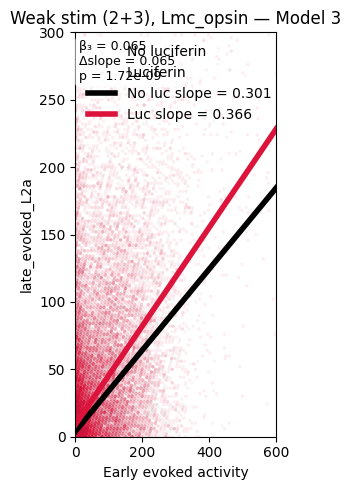


===== FULL MODEL (Lmc_noopsin) =====
β1 (early, no luc)   = 0.603108
β3 (interaction)     = -0.024390
Δslope               = -0.024390
p(β3)                = 1.889e-01
Slope no-luc         = 0.603108
Slope luc            = 0.578718

===== PLOTTED-SUBSET MODEL (Lmc_noopsin) =====
β1 (early, no luc)   = 0.570477
β3 (interaction)     = -0.042565
Δslope               = -0.042565
p(β3)                = 4.845e-02


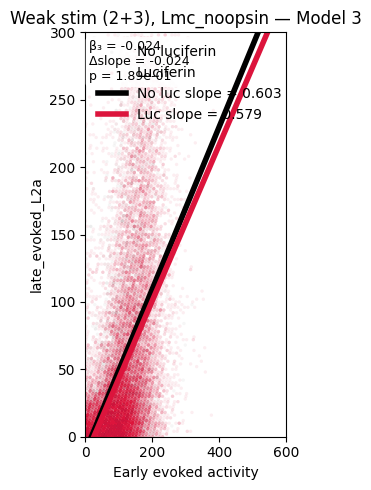

In [53]:
# Opsin
plot_trial_model3(
    df=df_multi_all_labeled,
    group="Lmc_opsin",
    late_col="late_evoked_L2a"
)

# No-opsin
plot_trial_model3(
    df=df_multi_all_labeled,
    group="Lmc_noopsin",
    late_col="late_evoked_L2a"
)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_group_comparison_delta(
    df,
    late_col,
    groups=("Lmc_opsin", "Lmc_noopsin"),
    stim_ids=(2, 3),
    x_min=0,
    x_max=300,
    bin_width=75,
    error_type="sem",     # "sem" or "bootstrap"
    n_boot=1000,
    random_state=0
):
    """
    Plot luciferin-dependent gain:
        ΔLate = Late(Luc) − Late(NoLuc)
    as a function of early activity using shared bin centers.

    - error_type: "sem" or "bootstrap"
    - N per bin is always annotated
    - Statistics come from regression elsewhere; this is visualization only
    """

    rng = np.random.default_rng(random_state)
    plt.figure(figsize=(7, 5))

    # Define shared bins and centers ONCE
    bins = np.arange(x_min, x_max + bin_width, bin_width)
    bin_centers = np.array([(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)])

    for group, color in zip(groups, ["crimson", "black"]):

        dfg = df[
            (df["group"] == group) &
            (df["stim_id"].isin(stim_ids)) &
            (df["early_evoked"] >= x_min) &
            (df["early_evoked"] <= x_max)
        ].copy()

        dfg["early_bin"] = pd.cut(dfg["early_evoked"], bins=bins)

        # Mean late activity per bin per condition
        grp = dfg.groupby(["early_bin", "luciferin"])[late_col]

        mean = grp.mean().unstack()
        delta = mean[1] - mean[0]   # Luc − NoLuc

        # Trial counts per bin (always shown)
        counts = dfg.groupby("early_bin").size()

        # ----------------------------
        # Error bars
        # ----------------------------
        if error_type == "sem":
            sem = grp.sem().unstack()
            yerr = np.sqrt(sem[1]**2 + sem[0]**2)

        elif error_type == "bootstrap":
            ci_low, ci_high = [], []

            for b in mean.index:
                sub = dfg[dfg["early_bin"] == b]
                luc_vals = sub[sub["luciferin"] == 1][late_col].values
                noluc_vals = sub[sub["luciferin"] == 0][late_col].values

                if len(luc_vals) == 0 or len(noluc_vals) == 0:
                    ci_low.append(np.nan)
                    ci_high.append(np.nan)
                    continue

                boots = []
                for _ in range(n_boot):
                    luc_s = rng.choice(luc_vals, size=len(luc_vals), replace=True)
                    noluc_s = rng.choice(noluc_vals, size=len(noluc_vals), replace=True)
                    boots.append(luc_s.mean() - noluc_s.mean())

                ci_low.append(np.percentile(boots, 2.5))
                ci_high.append(np.percentile(boots, 97.5))

            yerr = np.vstack([
                delta.values - np.array(ci_low),
                np.array(ci_high) - delta.values
            ])

        else:
            raise ValueError("error_type must be 'sem' or 'bootstrap'")

        # ----------------------------
        # Plot
        # ----------------------------
        plt.errorbar(
            bin_centers,
            delta.values,
            yerr=yerr,
            marker="o",
            linewidth=2,
            capsize=3,
            color=color,
            label=f"{group} ({error_type})"
        )

        # Annotate N per bin (always)
        for xi, yi, n in zip(bin_centers, delta.values, counts):
            plt.text(
                xi, yi,
                f"n={int(n)}",
                fontsize=7,
                ha="center",
                va="bottom",
                alpha=0.7
            )

    plt.axhline(0, color="gray", linestyle="--")
    plt.xlabel("Early evoked activity (bin center)")
    plt.ylabel("Δ Late activity (Luc − NoLuc)")
    plt.title("Spike-history–dependent gain comparison")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

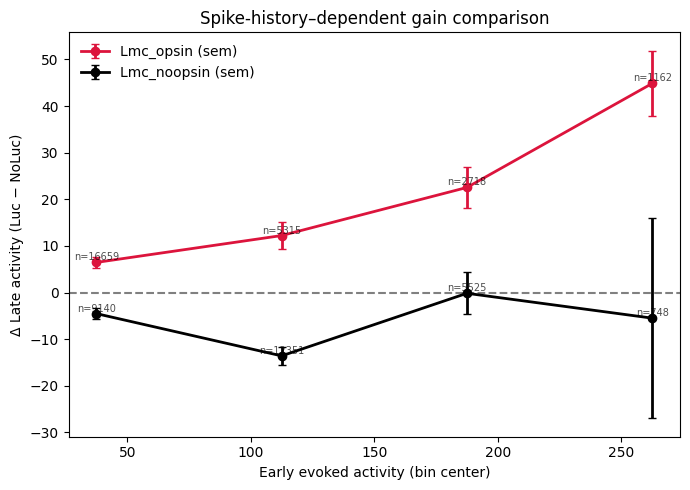

In [55]:
plot_group_comparison_delta(
    df_multi_all_labeled,
    late_col="late_evoked_L2a",
    error_type="sem"
)

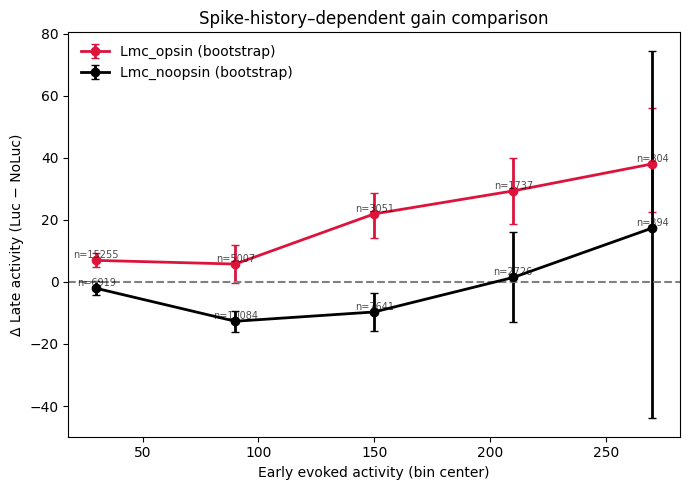

In [56]:
plot_group_comparison_delta(
    df_multi_all_labeled,
    late_col="late_evoked_L2a",
    error_type="bootstrap",
    n_boot=1000, 
    bin_width=60
)

In [57]:
import numpy as np
import pandas as pd

def extract_trial_counts_per_recording(
    df,
    group,
    stim_ids=(2,3),
    x_min=0,
    x_max=300,
    bin_width=75
):
    """
    Returns a table of trial counts per recording per early-activity bin.
    """

    dfg = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids)) &
        (df["early_evoked"] >= x_min) &
        (df["early_evoked"] <= x_max)
    ].copy()

    bins = np.arange(x_min, x_max + bin_width, bin_width)
    dfg["early_bin"] = pd.cut(dfg["early_evoked"], bins=bins)

    counts = (
        dfg
        .groupby(["recording", "early_bin"])
        .size()
        .reset_index(name="n_trials")
    )

    return counts

counts_opsin = extract_trial_counts_per_recording(
    df_multi_all_labeled,
    group="Lmc_opsin"
)

counts_noopsin = extract_trial_counts_per_recording(
    df_multi_all_labeled,
    group="Lmc_noopsin"
)

In [58]:
def summarize_counts(counts_df):
    return (
        counts_df
        .groupby("early_bin")["n_trials"]
        .agg(
            total_trials="sum",
            mean_per_recording="mean",
            min_per_recording="min",
            max_per_recording="max",
            n_recordings="count"
        )
        .reset_index()
    )

summary_opsin = summarize_counts(counts_opsin)
summary_noopsin = summarize_counts(counts_noopsin)

summary_opsin, summary_noopsin

(    early_bin  total_trials  mean_per_recording  min_per_recording  \
 0     (0, 75]         16659         5553.000000               5282   
 1   (75, 150]          5315         1771.666667                321   
 2  (150, 225]          2718          906.000000                 77   
 3  (225, 300]          1162          387.333333                 28   
 
    max_per_recording  n_recordings  
 0               5848             3  
 1               4284             3  
 2               2470             3  
 3               1072             3  ,
     early_bin  total_trials  mean_per_recording  min_per_recording  \
 0     (0, 75]          9140              4570.0               3099   
 1   (75, 150]         12351              6175.5               5145   
 2  (150, 225]          5525              2762.5               1572   
 3  (225, 300]           748               374.0                194   
 
    max_per_recording  n_recordings  
 0               6041             2  
 1               72

In [59]:
import pandas as pd
import statsmodels.api as sm

def extract_trial_model3_coefficients(
    df,
    group,
    stim_ids=[2, 3],
    late_col="late_evoked_L2a",
):
    """
    Extract β₁ and β₃ (with 95% CI) from the FULL per-trial Model 3,
    using the exact same logic as plot_trial_model3.
    """

    # FULL DATASET (canonical)
    df_full = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
    df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

    X = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
    y = df_full[late_col]

    model = sm.OLS(y, X).fit()
    ci = model.conf_int()

    return pd.DataFrame({
        "coef": ["β₁ (early)", "β₃ (early × luc)"],
        "value": [
            model.params["early_c"],
            model.params["early_x_luc"]
        ],
        "ci_low": [
            ci.loc["early_c", 0],
            ci.loc["early_x_luc", 0]
        ],
        "ci_high": [
            ci.loc["early_c", 1],
            ci.loc["early_x_luc", 1]
        ],
        "group": group
    })

In [60]:
df_opsin   = extract_trial_model3_coefficients(
    df_multi_all_labeled,
    group="Lmc_opsin",
    late_col="late_evoked_L2a"
)

df_noopsin = extract_trial_model3_coefficients(
    df_multi_all_labeled,
    group="Lmc_noopsin",
    late_col="late_evoked_L2a"
)

df_coefs = pd.concat([df_opsin, df_noopsin], ignore_index=True)
df_coefs

coef     value    ci_low   ci_high        group
0        β₁ (early)  0.301295  0.281698  0.320893    Lmc_opsin
1  β₃ (early × luc)  0.064659  0.043619  0.085699    Lmc_opsin
2        β₁ (early)  0.603108  0.568474  0.637742  Lmc_noopsin
3  β₃ (early × luc) -0.024390 -0.060772  0.011993  Lmc_noopsin

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model3_coefficients_bar(df_coefs):
    labels = ["β₁ (early)", "β₃ (early × luc)"]
    groups = df_coefs["group"].unique()

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(5.5, 4.5))

    for i, group in enumerate(groups):
        sub = df_coefs[df_coefs["group"] == group]

        y = sub["value"].values
        yerr = np.vstack([
            y - sub["ci_low"].values,
            sub["ci_high"].values - y
        ])

        plt.bar(
            x + i * width,
            y,
            width=width,
            yerr=yerr,
            capsize=6,
            alpha=0.85,
            label=group
        )

    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.xticks(x + width / 2, labels)
    plt.ylabel("Regression coefficient (95% CI)")
    plt.title("Per-trial Model 3 coefficients (L2a)")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

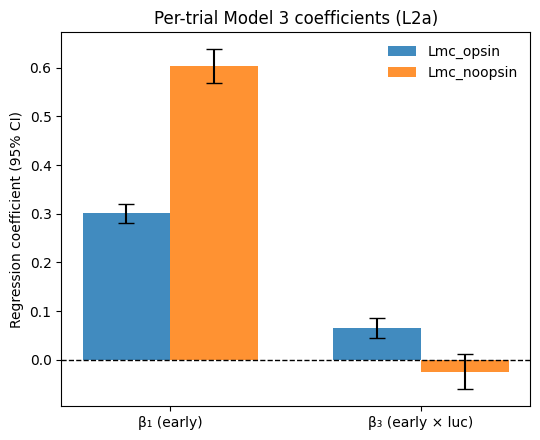

In [62]:
plot_model3_coefficients_bar(df_coefs)

In [63]:
import pandas as pd
import statsmodels.api as sm

def extract_trial_model3_coefficients(
    df,
    group,
    stim_ids=[2, 3],
    late_col="late_evoked_L2a",
):
    # FULL DATASET (same logic as plot_trial_model3)
    df_full = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
    df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

    X = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
    y = df_full[late_col]

    model = sm.OLS(y, X).fit()
    ci = model.conf_int()

    return pd.DataFrame({
        "coef": ["β₁ (early)", "β₂ (luciferin)", "β₃ (early × luc)"],
        "value": [
            model.params["early_c"],
            model.params["luciferin"],
            model.params["early_x_luc"],
        ],
        "ci_low": [
            ci.loc["early_c", 0],
            ci.loc["luciferin", 0],
            ci.loc["early_x_luc", 0],
        ],
        "ci_high": [
            ci.loc["early_c", 1],
            ci.loc["luciferin", 1],
            ci.loc["early_x_luc", 1],
        ],
        "group": group
    })

In [64]:
df_opsin   = extract_trial_model3_coefficients(df_multi_all_labeled, "Lmc_opsin")
df_noopsin = extract_trial_model3_coefficients(df_multi_all_labeled, "Lmc_noopsin")

df_coefs = pd.concat([df_opsin, df_noopsin], ignore_index=True)

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model3_coefficients_collage(df_coefs):
    """
    1x2 layout:
      Left  = full Model 3 coefficients (β1, β2, β3)
      Right = zoomed view of β1 and β3 only
    Coefficient values are printed on bars.
    """

    labels_full = ["β₁ (early)", "β₂ (luciferin)", "β₃ (early × luc)"]
    labels_zoom = ["β₁ (early)", "β₃ (early × luc)"]

    groups = df_coefs["group"].unique()
    colors = {
        "Lmc_opsin": "#3b75af",
        "Lmc_noopsin": "#f39c34"
    }

    width = 0.35

    fig, axes = plt.subplots(
        1, 2,
        figsize=(8.5, 4.2),
        gridspec_kw={"width_ratios": [2.2, 1]}
    )

    # =========================
    # LEFT PANEL: Full model
    # =========================
    ax = axes[0]
    x_full = np.arange(len(labels_full))

    for i, group in enumerate(groups):
        sub = df_coefs[df_coefs["group"] == group]

        y = sub["value"].values
        yerr = np.vstack([
            y - sub["ci_low"].values,
            sub["ci_high"].values - y
        ])

        bars = ax.bar(
            x_full + i * width,
            y,
            width=width,
            yerr=yerr,
            capsize=5,
            color=colors[group],
            alpha=0.85,
            label=group
        )

        # ---- annotate values ----
        for bar, val in zip(bars, y):
            va = "bottom" if val >= 0 else "top"
            offset = 0.02 * (ax.get_ylim()[1] - ax.get_ylim()[0])
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                val + (offset if val >= 0 else -offset),
                f"{val:.2f}",
                ha="center",
                va=va,
                fontsize=9
            )

    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xticks(x_full + width / 2)
    ax.set_xticklabels(labels_full)
    ax.set_ylabel("Regression coefficient (95% CI)")
    ax.set_title("Per-trial Model 3 coefficients (L2a)")
    ax.legend(frameon=False)

    # =========================
    # RIGHT PANEL: Zoom β1 & β3
    # =========================
    axz = axes[1]
    zoom_df = df_coefs[df_coefs["coef"].isin(labels_zoom)]
    x_zoom = np.arange(len(labels_zoom))

    for i, group in enumerate(groups):
        sub = zoom_df[zoom_df["group"] == group]

        y = sub["value"].values
        yerr = np.vstack([
            y - sub["ci_low"].values,
            sub["ci_high"].values - y
        ])

        bars = axz.bar(
            x_zoom + i * width,
            y,
            width=width,
            yerr=yerr,
            capsize=5,
            color=colors[group],
            alpha=0.85
        )

        # ---- annotate values ----
        for bar, val in zip(bars, y):
            va = "bottom" if val >= 0 else "top"
            offset = 0.02 * (axz.get_ylim()[1] - axz.get_ylim()[0])
            axz.text(
                bar.get_x() + bar.get_width() / 2,
                val + (offset if val >= 0 else -offset),
                f"{val:.2f}",
                ha="center",
                va=va,
                fontsize=9
            )

    axz.axhline(0, color="black", linestyle="--", linewidth=1)
    axz.set_xticks(x_zoom + width / 2)
    axz.set_xticklabels(labels_zoom)
    axz.set_title("Gain-related terms")

    # Tight y-range to emphasize β3
    ymin = zoom_df["ci_low"].min()
    ymax = zoom_df["ci_high"].max()
    pad = 0.15 * (ymax - ymin)
    axz.set_ylim(ymin - pad, ymax + pad)

    # =========================
    # Final polish
    # =========================
    for a in axes:
        a.spines["top"].set_visible(False)
        a.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

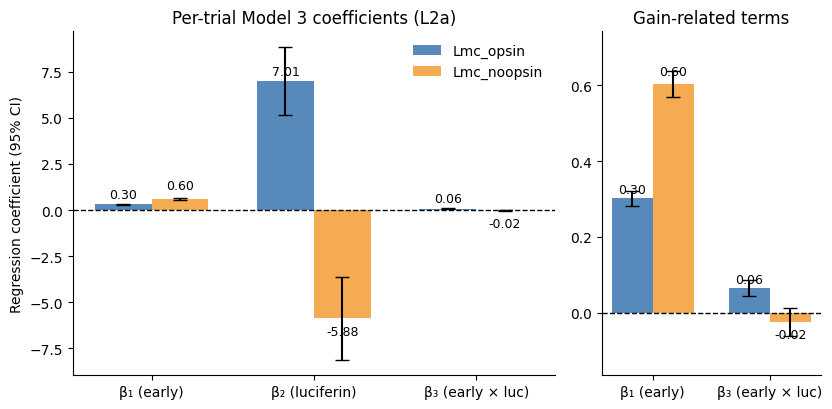

In [79]:
plot_model3_coefficients_collage(df_coefs)

In [66]:
def print_model3_summary(
    df,
    group,
    stim_ids=[2, 3],
    late_col="late_evoked_L2a",
):
    df_full = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
    df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

    X = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
    y = df_full[late_col]

    model = sm.OLS(y, X).fit()

    print(f"\n===== FULL MODEL 3 SUMMARY ({group}, L2a) =====")
    print(model.summary())

    return model

In [67]:
model_opsin   = print_model3_summary(df_multi_all_labeled, "Lmc_opsin")
model_noopsin = print_model3_summary(df_multi_all_labeled, "Lmc_noopsin")


===== FULL MODEL 3 SUMMARY (Lmc_opsin, L2a) =====
                            OLS Regression Results                            
Dep. Variable:        late_evoked_L2a   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3243.
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:05:45   Log-Likelihood:            -2.6726e+05
No. Observations:               47552   AIC:                         5.345e+05
Df Residuals:                   47548   BIC:                         5.346e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_model3_trials_with_channel_averages(
    df,
    group,
    stim_ids=[2, 3],
    late_col="late_evoked_L2a",
    xlim=(0, 300),
    ylim=(0, 300),
):
    """
    Plot:
      - ALL per-trial data points (raw)
      - Per-trial Model 3 regression lines (canonical)
      - Channel-averaged points per recording (overlay)

    Statistics come ONLY from the per-trial regression.
    """

    # ----------------------------
    # Filter data
    # ----------------------------
    df_full = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    # ----------------------------
    # Fit per-trial Model 3
    # ----------------------------
    df_full["early_c"] = df_full["early_evoked"] - df_full["early_evoked"].mean()
    df_full["early_x_luc"] = df_full["early_c"] * df_full["luciferin"]

    X = sm.add_constant(df_full[["early_c", "luciferin", "early_x_luc"]])
    y = df_full[late_col]
    model = sm.OLS(y, X).fit()

    b0, b1, b2, b3 = model.params
    p_b3 = model.pvalues["early_x_luc"]

    slope_no  = b1
    slope_luc = b1 + b3

    early_mean = df_full["early_evoked"].mean()
    intercept_no  = b0 - b1 * early_mean
    intercept_luc = (b0 + b2) - (b1 + b3) * early_mean

    # ----------------------------
    # Channel averages per recording
    # ----------------------------
    ch_avg = (
        df_full
        .groupby(["recording", "channel", "luciferin"], as_index=False)
        .agg(
            early_mean=("early_evoked", "mean"),
            late_mean=(late_col, "mean")
        )
    )

    # ----------------------------
    # Plot
    # ----------------------------
    plt.figure(figsize=(4.5, 5.5))

    # Per-trial scatter (RAW DATA)
    plt.scatter(
        df_full.loc[df_full.luciferin == 0, "early_evoked"],
        df_full.loc[df_full.luciferin == 0, late_col],
        s=4, alpha=0.05, color="gray", edgecolors="none",
        label="Trials (no luc)"
    )

    plt.scatter(
        df_full.loc[df_full.luciferin == 1, "early_evoked"],
        df_full.loc[df_full.luciferin == 1, late_col],
        s=4, alpha=0.05, color="crimson", edgecolors="none",
        label="Trials (luc)"
    )

    # Channel-level averages (per recording)
    plt.scatter(
        ch_avg.loc[ch_avg.luciferin == 0, "early_mean"],
        ch_avg.loc[ch_avg.luciferin == 0, "late_mean"],
        s=80, color="black", edgecolors="white", linewidth=1.2,
        label="Channel mean (no luc)"
    )

    plt.scatter(
        ch_avg.loc[ch_avg.luciferin == 1, "early_mean"],
        ch_avg.loc[ch_avg.luciferin == 1, "late_mean"],
        s=80, color="darkred", edgecolors="white", linewidth=1.2,
        label="Channel mean (luc)"
    )

    # Regression lines (from per-trial model)
    x_range = np.linspace(xlim[0], xlim[1], 300)

    plt.plot(
        x_range,
        intercept_no + slope_no * x_range,
        color="black", linewidth=3,
        label=f"No luc slope = {slope_no:.3f}"
    )

    plt.plot(
        x_range,
        intercept_luc + slope_luc * x_range,
        color="crimson", linewidth=3,
        label=f"Luc slope = {slope_luc:.3f}"
    )

    # Axes
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Early evoked activity")
    plt.ylabel(late_col)
    plt.title(f"{group} — per-trial Model 3 with channel averages")

    # Stats annotation
    plt.text(
        0.02, 0.98,
        f"β₃ = {b3:.3f}\np = {p_b3:.2e}",
        transform=plt.gca().transAxes,
        ha="left", va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)
    )

    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

    # Print stats (ground truth)
    print(f"\n===== PER-TRIAL MODEL 3 ({group}, L2a) =====")
    print(f"β₁ (early)       = {b1:.6f}")
    print(f"β₂ (luciferin)   = {b2:.6f}")
    print(f"β₃ (interaction) = {b3:.6f}")
    print(f"p(β₃)            = {p_b3:.3e}")

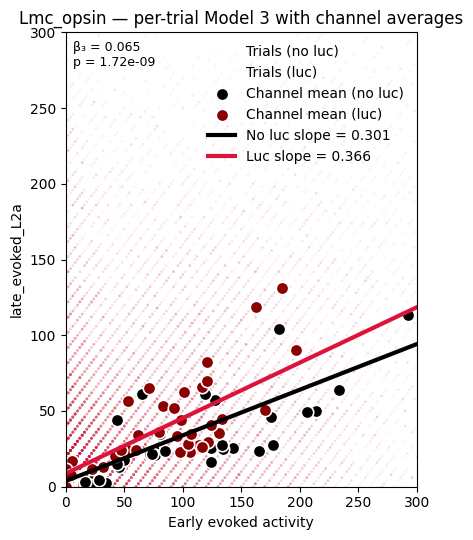


===== PER-TRIAL MODEL 3 (Lmc_opsin, L2a) =====
β₁ (early)       = 0.301295
β₂ (luciferin)   = 7.005293
β₃ (interaction) = 0.064659
p(β₃)            = 1.721e-09


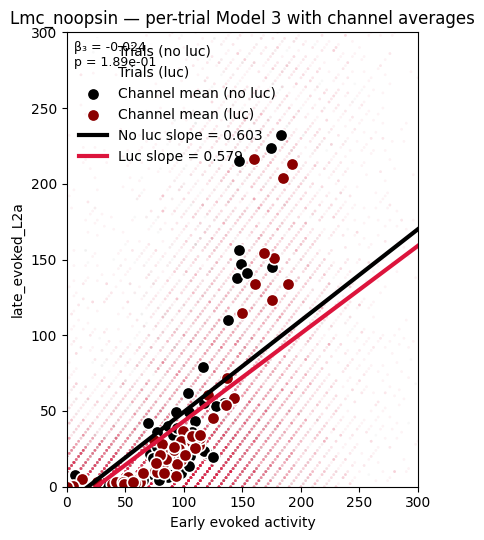


===== PER-TRIAL MODEL 3 (Lmc_noopsin, L2a) =====
β₁ (early)       = 0.603108
β₂ (luciferin)   = -5.878507
β₃ (interaction) = -0.024390
p(β₃)            = 1.889e-01


In [71]:
plot_model3_trials_with_channel_averages(
    df=df_multi_all_labeled,
    group="Lmc_opsin",
    late_col="late_evoked_L2a"
)

plot_model3_trials_with_channel_averages(
    df=df_multi_all_labeled,
    group="Lmc_noopsin",
    late_col="late_evoked_L2a"
)

# Channel level regression

In [46]:
import statsmodels.api as sm
import pandas as pd

class ChannelSpikeRegression:
    def __init__(self, df_multi_all):
        self.df = df_multi_all.copy()

    # ----------------------------
    # Internal helpers
    # ----------------------------
    def _filter_group(self, df=None, group=None):
        """Filter by group, applied to an input df (or self.df if df is None)."""
        if df is None:
            df = self.df
        if group is not None:
            df = df[df["group"] == group]
        return df

    def _filter_stim(self, df=None, stim_ids=None):
        """Filter by stim_ids, applied to an input df (or self.df if df is None)."""
        if df is None:
            df = self.df
        if stim_ids is not None:
            df = df[df["stim_id"].isin(stim_ids)]
        return df

    def _build_channel_df(self, df, late_col):
        """
        Collapse trial-level data to channel-level means.
        Each row = one recording × channel × luciferin condition.
        """
        required = ["recording", "channel", "luciferin", "early_evoked", late_col]
        df = df.dropna(subset=required).copy()

        ch_df = (
            df
            .groupby(["recording", "channel", "luciferin"], as_index=False)
            .agg(
                early_evoked_ch=("early_evoked", "mean"),
                late_evoked_ch=(late_col, "mean"),
                n_trials=("early_evoked", "count")
            )
        )
        return ch_df

    # ----------------------------
    # MODEL 1 (channel-level)
    # ----------------------------
    def model1_channel_late_vs_luciferin(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        verbose=True,
    ):
        df = self._filter_group(group=group)
        df = self._filter_stim(df=df, stim_ids=stim_ids)

        ch_df = self._build_channel_df(df, late_col)

        pre = ch_df[ch_df.luciferin == 0]["late_evoked_ch"]
        post = ch_df[ch_df.luciferin == 1]["late_evoked_ch"]

        X = sm.add_constant(ch_df["luciferin"])
        y = ch_df["late_evoked_ch"]
        model = sm.OLS(y, X).fit()

        if verbose:
            print(model.summary())

        summary = pd.DataFrame([{
            "model": "model1_channel",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "N_channels": ch_df["channel"].nunique(),
            "mean_noLuc": pre.mean(),
            "mean_Luc": post.mean(),
            "beta0": model.params["const"],
            "beta1": model.params["luciferin"],
            "p_beta1": model.pvalues["luciferin"],
        }])

        return model, summary

    # ----------------------------
    # MODEL 2 (channel-level)
    # ----------------------------
    def model2_channel_late_vs_early_and_luciferin(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        center_early=True,
        verbose=True,
    ):
        df = self._filter_group(group=group)
        df = self._filter_stim(df=df, stim_ids=stim_ids)

        ch_df = self._build_channel_df(df, late_col)

        if center_early:
            ch_df["early_c"] = ch_df["early_evoked_ch"] - ch_df["early_evoked_ch"].mean()
            early_col = "early_c"
        else:
            early_col = "early_evoked_ch"

        X = sm.add_constant(ch_df[[early_col, "luciferin"]])
        y = ch_df["late_evoked_ch"]
        model = sm.OLS(y, X).fit()

        if verbose:
            print(model.summary())

        summary = pd.DataFrame([{
            "model": "model2_channel",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "N_channels": ch_df["channel"].nunique(),
            "beta0": model.params["const"],
            "beta1_early": model.params[early_col],
            "beta2_luciferin": model.params["luciferin"],
            "p_beta1_early": model.pvalues[early_col],
            "p_beta2_luciferin": model.pvalues["luciferin"],
        }])

        return model, summary

    # ----------------------------
    # MODEL 3 (channel-level interaction)
    # ----------------------------
    def model3_channel_early_luciferin_interaction(
        self,
        group=None,
        stim_ids=None,
        late_col="late_evoked",
        center_early=True,
        verbose=True,
    ):
        df = self._filter_group(group=group)
        df = self._filter_stim(df=df, stim_ids=stim_ids)

        ch_df = self._build_channel_df(df, late_col)

        if center_early:
            ch_df["early_c"] = ch_df["early_evoked_ch"] - ch_df["early_evoked_ch"].mean()
            early_col = "early_c"
        else:
            early_col = "early_evoked_ch"

        ch_df["early_x_luc"] = ch_df[early_col] * ch_df["luciferin"]

        X = sm.add_constant(ch_df[[early_col, "luciferin", "early_x_luc"]])
        y = ch_df["late_evoked_ch"]
        model = sm.OLS(y, X).fit()

        if verbose:
            print(model.summary())

        summary = pd.DataFrame([{
            "model": "model3_channel",
            "group": group or "ALL",
            "stim_ids": stim_ids or "ALL",
            "late_col": late_col,
            "N_channels": ch_df["channel"].nunique(),
            "beta0": model.params["const"],
            "beta1_early": model.params[early_col],
            "beta2_luciferin": model.params["luciferin"],
            "beta3_interaction": model.params["early_x_luc"],
            "p_beta3_interaction": model.pvalues["early_x_luc"],
        }])

        return model, summary

### reanalysis of altered windows

In [47]:
def build_all_late_labeled2(ana,
                            modality="Whisker",
                            groups=("Lmc_noopsin","Lmc_opsin"),
                            late_windows=None,  # dict label -> (start, end)
                            baseline=(-0.5,0.0), early=(0,0.1), pre_n=30,
                            stim_pool={"NoStim":[1], "Weak":[2,3], "Max":[4]},
                            add_rates=True, keep_legacy=True):
    """
    Build a trial-level dataframe with labeled late windows (late_*_<label>).
    This does NOT touch the original build_all_multi_late flow; it's an additional builder.
    """
    if late_windows is None:
        late_windows = {"L1": (0.2, 1.0)}  # default single late window
    dfs = []
    for g in groups:
        rec_dirs = sorted((ana.output_base / modality / g).glob("*"))
        for rec_dir in rec_dirs:
            rec = rec_dir.name
            df = ana.compute_counts_late_labeled(
                group=g, rec=rec,
                baseline=baseline, early=early,
                late_windows=late_windows,
                pre_n=pre_n, stim_pool=stim_pool,
                add_rates=add_rates, keep_legacy=keep_legacy
            )
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()



In [48]:
# Configure
OUTPUT_BASE = Path("/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17")
ana = SpikeWindowAnalyzer(OUTPUT_BASE, modality="Whisker")

# Define labeled late windows (e.g., sub-bins)
late_windows_labeled = {
    "L2a": (0.20, 0.30),
    "L2b": (0.30, 0.40),
    "L2c": (0.40, 0.50),
}

# Build labeled trial-level table across all Whisker recordings/groups
df_multi_all_labeled = build_all_late_labeled2(
    ana,
    modality="Whisker",
    groups=("Lmc_noopsin","Lmc_opsin"),
    late_windows=late_windows_labeled,
    baseline=(-0.5,0.0), early=(0,0.1), pre_n=30,
    stim_pool={"NoStim":[1], "Weak":[2,3], "Max":[4]},
    add_rates=True, keep_legacy=True
)

print("[INFO] labeled combined shape:", df_multi_all_labeled.shape)
print("Columns:", df_multi_all_labeled.columns.tolist())
print("Groups:", df_multi_all_labeled['group'].unique())
print("Recordings:", df_multi_all_labeled['recording'].unique())


[LOAD] rec_dir=/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17/Whisker/Lmc_noopsin/lmc_noch_1_3096_rec1
[DEBUG] trials shape=(999, 3), columns=['onset_s', 'offset_s', 'stim_id'], stim_ids=[2, 1, 4, 3]
[DEBUG] spikes_rel shape=(32, 1000), dtype=object (times in seconds rel to onset)
[DEBUG] labeled-late df shape=(31968, 27), columns=['recording', 'group', 'stim_id', 'stim_pooled', 'trial_idx', 'trial_order_within_stim', 'luciferin', 'channel', 'baseline_window', 'early_window', 'baseline_spikes', 'early_spikes', 'baseline_rate', 'early_rate', 'early_evoked', 'late_spikes_L2a', 'late_rate_L2a', 'late_evoked_L2a', 'late_spikes', 'late_rate', 'late_evoked', 'late_spikes_L2b', 'late_rate_L2b', 'late_evoked_L2b', 'late_spikes_L2c', 'late_rate_L2c', 'late_evoked_L2c']
[LOAD] rec_dir=/Volumes/MannySSD/PSTH_custom_bin_1ms_gauss10ms_run17/Whisker/Lmc_noopsin/lmc_noch_1_3096_rec2
[DEBUG] trials shape=(991, 3), columns=['onset_s', 'offset_s', 'stim_id'], stim_ids=[3, 2, 4, 1]
[DEBUG] spikes_

In [49]:
import pandas as pd

# 1) instantiate with the NEW fixed class
reg_channel = ChannelSpikeRegression(df_multi_all_labeled)

# 2) choose windows (keep late_evoked but label it clearly)
LATE_WINDOWS = {
    "late_legacy": "late_evoked",
    "L2a": "late_evoked_L2a",
    "L2b": "late_evoked_L2b",
    "L2c": "late_evoked_L2c",
}

groups = ["Lmc_opsin", "Lmc_noopsin"]
stim_ids = [2, 3]

rows = []
for group in groups:
    for win_name, late_col in LATE_WINDOWS.items():
        if late_col not in df_multi_all_labeled.columns:
            print(f"[SKIP] {group} | {win_name} ({late_col}) not found")
            continue

        model, summary = reg_channel.model3_channel_early_luciferin_interaction(
            group=group,
            stim_ids=stim_ids,
            late_col=late_col,
            center_early=True,
            verbose=False,
        )

        if summary is not None:
            summary["window"] = win_name
            rows.append(summary)

df_ch_m3 = pd.concat(rows, ignore_index=True).sort_values(["window", "group"]).reset_index(drop=True)
df_ch_m3

model        group stim_ids         late_col  N_channels  \
0  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2a          32   
1  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2a          32   
2  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2b          32   
3  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2b          32   
4  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2c          32   
5  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2c          32   
6  model3_channel  Lmc_noopsin   [2, 3]      late_evoked          32   
7  model3_channel    Lmc_opsin   [2, 3]      late_evoked          32   

       beta0  beta1_early  beta2_luciferin  beta3_interaction  \
0  44.101019     1.066067        -8.005699          -0.070364   
1  13.738936     0.260685         6.899237           0.124617   
2  39.818966     0.897954        -6.986766          -0.032186   
3  15.740664     0.307389         3.525155           0.044258   
4  29.338991     0.779916         1.718996           0.093945   
5  10.491531     0.261722         7.679762           0.039671   
6  44.101019     1.066067        -8.005699          -0.070364   
7  13.738936     0.260685         6.899237           0.124617   

   p_beta3_interaction       window  
0             0.584771          L2a  
1             0.000066          L2a  
2             0.785565          L2b  
3             0.214907          L2b  
4             0.390874          L2c  
5             0.175739          L2c  
6             0.584771  late_legacy  
7             0.000066  late_legacy

In [50]:
df_ch_m3.pivot_table(
    index="window",
    columns="group",
    values=["beta3_interaction", "p_beta3_interaction"],
    aggfunc="first"
)

beta3_interaction           p_beta3_interaction          
group             Lmc_noopsin Lmc_opsin         Lmc_noopsin Lmc_opsin
window                                                               
L2a                 -0.070364  0.124617            0.584771  0.000066
L2b                 -0.032186  0.044258            0.785565  0.214907
L2c                  0.093945  0.039671            0.390874  0.175739
late_legacy         -0.070364  0.124617            0.584771  0.000066

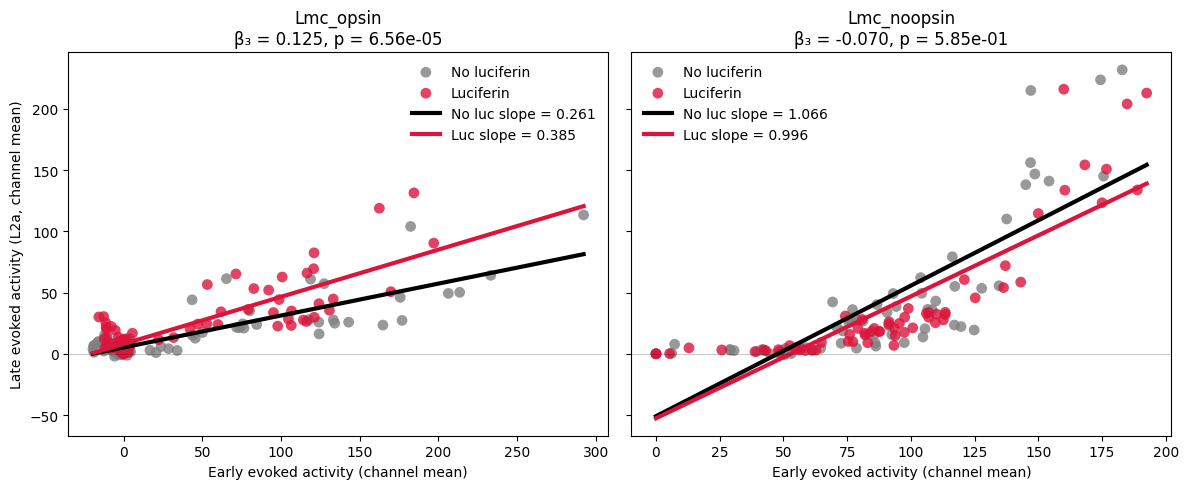

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --------------------------------------------------
# Build channel-level dataframe for L2a
# --------------------------------------------------
def build_channel_df(df, group, stim_ids, late_col):
    df = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["recording", "channel", "luciferin", "early_evoked", late_col]).copy()

    ch_df = (
        df
        .groupby(["recording", "channel", "luciferin"], as_index=False)
        .agg(
            early_evoked_ch=("early_evoked", "mean"),
            late_evoked_ch=(late_col, "mean")
        )
    )
    return ch_df


def fit_channel_model3(ch_df):
    # center early
    ch_df = ch_df.copy()
    ch_df["early_c"] = ch_df["early_evoked_ch"] - ch_df["early_evoked_ch"].mean()
    ch_df["early_x_luc"] = ch_df["early_c"] * ch_df["luciferin"]

    X = sm.add_constant(ch_df[["early_c", "luciferin", "early_x_luc"]])
    y = ch_df["late_evoked_ch"]
    model = sm.OLS(y, X).fit()

    return model, ch_df


# --------------------------------------------------
# Parameters
# --------------------------------------------------
late_col = "late_evoked_L2a"
stim_ids = [2, 3]
groups = ["Lmc_opsin", "Lmc_noopsin"]

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, group in zip(axes, groups):

    # Build channel-level data
    ch_df = build_channel_df(df_multi_all_labeled, group, stim_ids, late_col)

    # Fit Model 3
    model, ch_df = fit_channel_model3(ch_df)

    b0 = model.params["const"]
    b1 = model.params["early_c"]
    b2 = model.params["luciferin"]
    b3 = model.params["early_x_luc"]
    p_b3 = model.pvalues["early_x_luc"]

    # Slopes
    slope_no = b1
    slope_luc = b1 + b3

    # Intercepts in raw early coordinates
    early_mean = ch_df["early_evoked_ch"].mean()
    intercept_no = b0 - b1 * early_mean
    intercept_luc = (b0 + b2) - (b1 + b3) * early_mean

    # Scatter (one dot per channel per condition)
    ax.scatter(
        ch_df.loc[ch_df.luciferin == 0, "early_evoked_ch"],
        ch_df.loc[ch_df.luciferin == 0, "late_evoked_ch"],
        s=60, color="gray", edgecolors="none", alpha=0.8, label="No luciferin"
    )

    ax.scatter(
        ch_df.loc[ch_df.luciferin == 1, "early_evoked_ch"],
        ch_df.loc[ch_df.luciferin == 1, "late_evoked_ch"],
        s=60, color="crimson", edgecolors="none", alpha=0.8, label="Luciferin"
    )

    # Regression lines
    x_range = np.linspace(
        ch_df["early_evoked_ch"].min(),
        ch_df["early_evoked_ch"].max(),
        200
    )

    ax.plot(
        x_range,
        intercept_no + slope_no * x_range,
        color="black", linewidth=3,
        label=f"No luc slope = {slope_no:.3f}"
    )

    ax.plot(
        x_range,
        intercept_luc + slope_luc * x_range,
        color="crimson", linewidth=3,
        label=f"Luc slope = {slope_luc:.3f}"
    )

    # Labels and annotation
    ax.set_title(f"{group}\nβ₃ = {b3:.3f}, p = {p_b3:.2e}")
    ax.set_xlabel("Early evoked activity (channel mean)")
    ax.axhline(0, color="black", linewidth=0.5, alpha=0.3)

    if ax is axes[0]:
        ax.set_ylabel("Late evoked activity (L2a, channel mean)")

    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [52]:
# --------------------------------------------------
# CHANNEL-LEVEL Models 1–3 × Groups × Windows
# --------------------------------------------------

reg_ch = ChannelSpikeRegression(df_multi_all_labeled)

GROUPS = ["Lmc_opsin", "Lmc_noopsin"]
STIM_IDS = [2, 3]
LATE_WINDOWS = {
    "L2a": "late_evoked_L2a",
    "L2b": "late_evoked_L2b",
    "L2c": "late_evoked_L2c",
}

rows_m1, rows_m2, rows_m3 = [], [], []

for group in GROUPS:
    for win, late_col in LATE_WINDOWS.items():

        # ---------- Model 1 (channel) ----------
        _, s1 = reg_ch.model1_channel_late_vs_luciferin(
            group=group,
            stim_ids=STIM_IDS,
            late_col=late_col,
            verbose=False,
        )
        if s1 is not None:
            s1["window"] = win
            rows_m1.append(s1)

        # ---------- Model 2 (channel) ----------
        _, s2 = reg_ch.model2_channel_late_vs_early_and_luciferin(
            group=group,
            stim_ids=STIM_IDS,
            late_col=late_col,
            center_early=True,
            verbose=False,
        )
        if s2 is not None:
            s2["window"] = win
            rows_m2.append(s2)

        # ---------- Model 3 (channel, KEY) ----------
        _, s3 = reg_ch.model3_channel_early_luciferin_interaction(
            group=group,
            stim_ids=STIM_IDS,
            late_col=late_col,
            center_early=True,
            verbose=False,
        )
        if s3 is not None:
            s3["window"] = win
            rows_m3.append(s3)

df_ch_m1 = pd.concat(rows_m1, ignore_index=True)
df_ch_m2 = pd.concat(rows_m2, ignore_index=True)
df_ch_m3 = pd.concat(rows_m3, ignore_index=True)

print("CHANNEL MODEL 1")
display(df_ch_m1)

print("CHANNEL MODEL 2")
display(df_ch_m2)

print("CHANNEL MODEL 3 (KEY)")
display(df_ch_m3)

CHANNEL MODEL 1


model        group stim_ids         late_col  N_channels  \
0  model1_channel    Lmc_opsin   [2, 3]  late_evoked_L2a          32   
1  model1_channel    Lmc_opsin   [2, 3]  late_evoked_L2b          32   
2  model1_channel    Lmc_opsin   [2, 3]  late_evoked_L2c          32   
3  model1_channel  Lmc_noopsin   [2, 3]  late_evoked_L2a          32   
4  model1_channel  Lmc_noopsin   [2, 3]  late_evoked_L2b          32   
5  model1_channel  Lmc_noopsin   [2, 3]  late_evoked_L2c          32   

   mean_noLuc   mean_Luc      beta0     beta1   p_beta1 window  
0   13.937223  20.345097  13.937223  6.407874  0.055799    L2a  
1   15.974476  18.998341  15.974476  3.023865  0.397938    L2b  
2   10.690607  17.942041  10.690607  7.251433  0.016845    L2c  
3   40.921337  39.065134  40.921337 -1.856203  0.849954    L2a  
4   37.140704  35.414463  37.140704 -1.726242  0.840997    L2b  
5   27.012791  33.664390  27.012791  6.651599  0.409785    L2c

CHANNEL MODEL 2


model        group stim_ids         late_col  N_channels  \
0  model2_channel    Lmc_opsin   [2, 3]  late_evoked_L2a          32   
1  model2_channel    Lmc_opsin   [2, 3]  late_evoked_L2b          32   
2  model2_channel    Lmc_opsin   [2, 3]  late_evoked_L2c          32   
3  model2_channel  Lmc_noopsin   [2, 3]  late_evoked_L2a          32   
4  model2_channel  Lmc_noopsin   [2, 3]  late_evoked_L2b          32   
5  model2_channel  Lmc_noopsin   [2, 3]  late_evoked_L2c          32   

       beta0  beta1_early  beta2_luciferin  p_beta1_early  p_beta2_luciferin  \
0  13.701233     0.310252         6.879854   2.034906e-48           0.000361   
1  15.727273     0.324993         3.518271   1.080180e-44           0.099305   
2  10.479528     0.277502         7.673591   8.591581e-47           0.000018   
3  43.989522     1.028685        -7.992574   2.938306e-32           0.157574   
4  39.767965     0.880854        -6.980763   9.501385e-30           0.178706   
5  29.487854     0.829826         1.701473   2.513832e-30           0.722693   

  window  
0    L2a  
1    L2b  
2    L2c  
3    L2a  
4    L2b  
5    L2c

CHANNEL MODEL 3 (KEY)


model        group stim_ids         late_col  N_channels  \
0  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2a          32   
1  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2b          32   
2  model3_channel    Lmc_opsin   [2, 3]  late_evoked_L2c          32   
3  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2a          32   
4  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2b          32   
5  model3_channel  Lmc_noopsin   [2, 3]  late_evoked_L2c          32   

       beta0  beta1_early  beta2_luciferin  beta3_interaction  \
0  13.738936     0.260685         6.899237           0.124617   
1  15.740664     0.307389         3.525155           0.044258   
2  10.491531     0.261722         7.679762           0.039671   
3  44.101019     1.066067        -8.005699          -0.070364   
4  39.818966     0.897954        -6.986766          -0.032186   
5  29.338991     0.779916         1.718996           0.093945   

   p_beta3_interaction window  
0             0.000066    L2a  
1             0.214907    L2b  
2             0.175739    L2c  
3             0.584771    L2a  
4             0.785565    L2b  
5             0.390874    L2c

# final run

In [ ]:
import statsmodels.api as sm
import pandas as pd

def fit_model3_and_extract(df, group, late_col="late_evoked_L2a", stim_ids=(2,3)):
    sub = df[
        (df["group"] == group) &
        (df["stim_id"].isin(stim_ids))
    ].dropna(subset=["early_evoked", late_col, "luciferin"]).copy()

    sub["early_c"] = sub["early_evoked"] - sub["early_evoked"].mean()
    sub["early_x_luc"] = sub["early_c"] * sub["luciferin"]

    X = sm.add_constant(sub[["early_c", "luciferin", "early_x_luc"]])
    y = sub[late_col]

    model = sm.OLS(y, X).fit()

    coefs = model.params
    ci = model.conf_int()

    return pd.DataFrame({
        "coef": ["β₁ (early)", "β₃ (early × luc)"],
        "value": [coefs["early_c"], coefs["early_x_luc"]],
        "ci_low": [ci.loc["early_c", 0], ci.loc["early_x_luc", 0]],
        "ci_high": [ci.loc["early_c", 1], ci.loc["early_x_luc", 1]],
        "group": group
    })

In [ ]:
df_opsin   = fit_model3_and_extract(df_multi_all_labeled, "Lmc_opsin")
df_noopsin = fit_model3_and_extract(df_multi_all_labeled, "Lmc_noopsin")

df_coefs = pd.concat([df_opsin, df_noopsin], ignore_index=True)